# Introduction

Author: Jihoon Park (jhpark3@stanford.edu)

Two notebooks are prepared to demonstrate and reproduce results from the draft submitted to Computers and Geosciences (CAGEO_2019_892). The current notebook(notebook2)is continuation of [notebook1](Notebook1_Direct_Forecasting_of_Model_Variables.ipynb) and mainly deals with post-processing and visualization of results. See [notebook1](Notebook1_Direct_Forecasting_of_Model_Variables.ipynb) to fetch required data.

# Initialization

In [1]:
clear all; close all; fclose('all');
imatlab_export_fig('print-png')

# Paths

In [2]:
addpath('../packages/fda_matlab/')
addpath('../subroutines');
addpath('../packages/DGSA/');
addpath(genpath('../datafiles'))

# Inputs

In [3]:
FigSizeResp = [319 215 1245 642];
VarKeep_Spatial = 95;

Index.Oilrate=4;
Index.Watercut=8;
Index.Time =2; 
MaxTimeHistory = 7500;
ReferenceNumberPrior = 106;
FigSize_outputs = [319 215 1245 642];

NPrior = 1500;


WellNamesAll = {'P1','P2','P3','P4','P5','PNEW2'};
WellNamesData = {'P1','P2','P3','P4','P5'};
WellNamesPrediction = {'PNEW2'};

# Load simulation results (Prior)

In [4]:
load('PriorSimulationResults.mat')

Define Timesteps

In [5]:
ReferenceTimeStep.All = Data{ReferenceNumberPrior}.(WellNamesAll {1})(:,2);  
ReferenceTimeStep.Data = ReferenceTimeStep.All(ReferenceTimeStep.All<=MaxTimeHistory);
ReferenceTimeStep.Prediction = ReferenceTimeStep.All(ReferenceTimeStep.All>MaxTimeHistory);

# Process the data and prediction variables

In [6]:
% Data variable, Oil rate
[PriorDataOilrate,PriorDataTimeStep]=Convert_3DSL_Response(Data,Index.Oilrate,WellNamesData,ReferenceTimeStep.Data,Index.Time);

% Data variable, Watercut
PriorDataWatercut = Convert_3DSL_Response(Data,Index.Watercut,WellNamesData,ReferenceTimeStep.Data,Index.Time);

PriorDataWatercut = PriorDataWatercut/100; 

% Prediction variable, Oil rate
[PriorPredictionOilrate,PriorPredictionTimeStep] = Convert_3DSL_Response(Data,Index.Oilrate,WellNamesPrediction,ReferenceTimeStep.Prediction,Index.Time);


% Split the observed and simulated
% observed = History

% Split data variables
[Prior.Data.Oilrate.History,Prior.Data.Oilrate.Simulated] = SplitDataObservedSimulated(PriorDataOilrate,ReferenceNumberPrior);
[Prior.Data.Watercut.History,Prior.Data.Watercut.Simulated] = SplitDataObservedSimulated(PriorDataWatercut, ReferenceNumberPrior);

% Split prediction variables
[Prior.Prediction.Oilrate.History,Prior.Prediction.Oilrate.Simulated] = SplitDataObservedSimulated(PriorPredictionOilrate,ReferenceNumberPrior);

## Load simulation results from 1st iteration

For consistency, reference field is included, indexed 1.

In [7]:
ReferenceNumberPosterior1 = 1;
load('SimulationResults_Iter1.mat')


% Data variable, Oil rate
[Posterior1DataOilrate,Posterior1DataTimeStep]=Convert_3DSL_Response(Data,Index.Oilrate,WellNamesData,ReferenceTimeStep.Data,Index.Time);
Posterior1DataWatercut = Convert_3DSL_Response(Data,Index.Watercut,WellNamesData,ReferenceTimeStep.Data,Index.Time);
Posterior1DataWatercut = Posterior1DataWatercut/100;

[Posterior1PredictionOilrate,Posterior1PredictionTimeStep] = ...
    Convert_3DSL_Response(Data,Index.Oilrate,WellNamesPrediction,ReferenceTimeStep.Prediction,Index.Time);

% Split data variables
[Posterior1.Data.Oilrate.History,Posterior1.Data.Oilrate.Simulated] = SplitDataObservedSimulated(Posterior1DataOilrate,ReferenceNumberPosterior1);
[Posterior1.Data.Watercut.History,Posterior1.Data.Watercut.Simulated] = SplitDataObservedSimulated(Posterior1DataWatercut, ReferenceNumberPosterior1);

% Split prediction variables
[Posterior1.Prediction.Oilrate.History,Posterior1.Prediction.Oilrate.Simulated] = SplitDataObservedSimulated(Posterior1PredictionOilrate,ReferenceNumberPosterior1);

The code block below visualizes data and prediction variabes. `PlotAllResponse_Prior_PostQuantiles` displays prior responses (gray lines), corresponding quantiles (blue dotted lines).



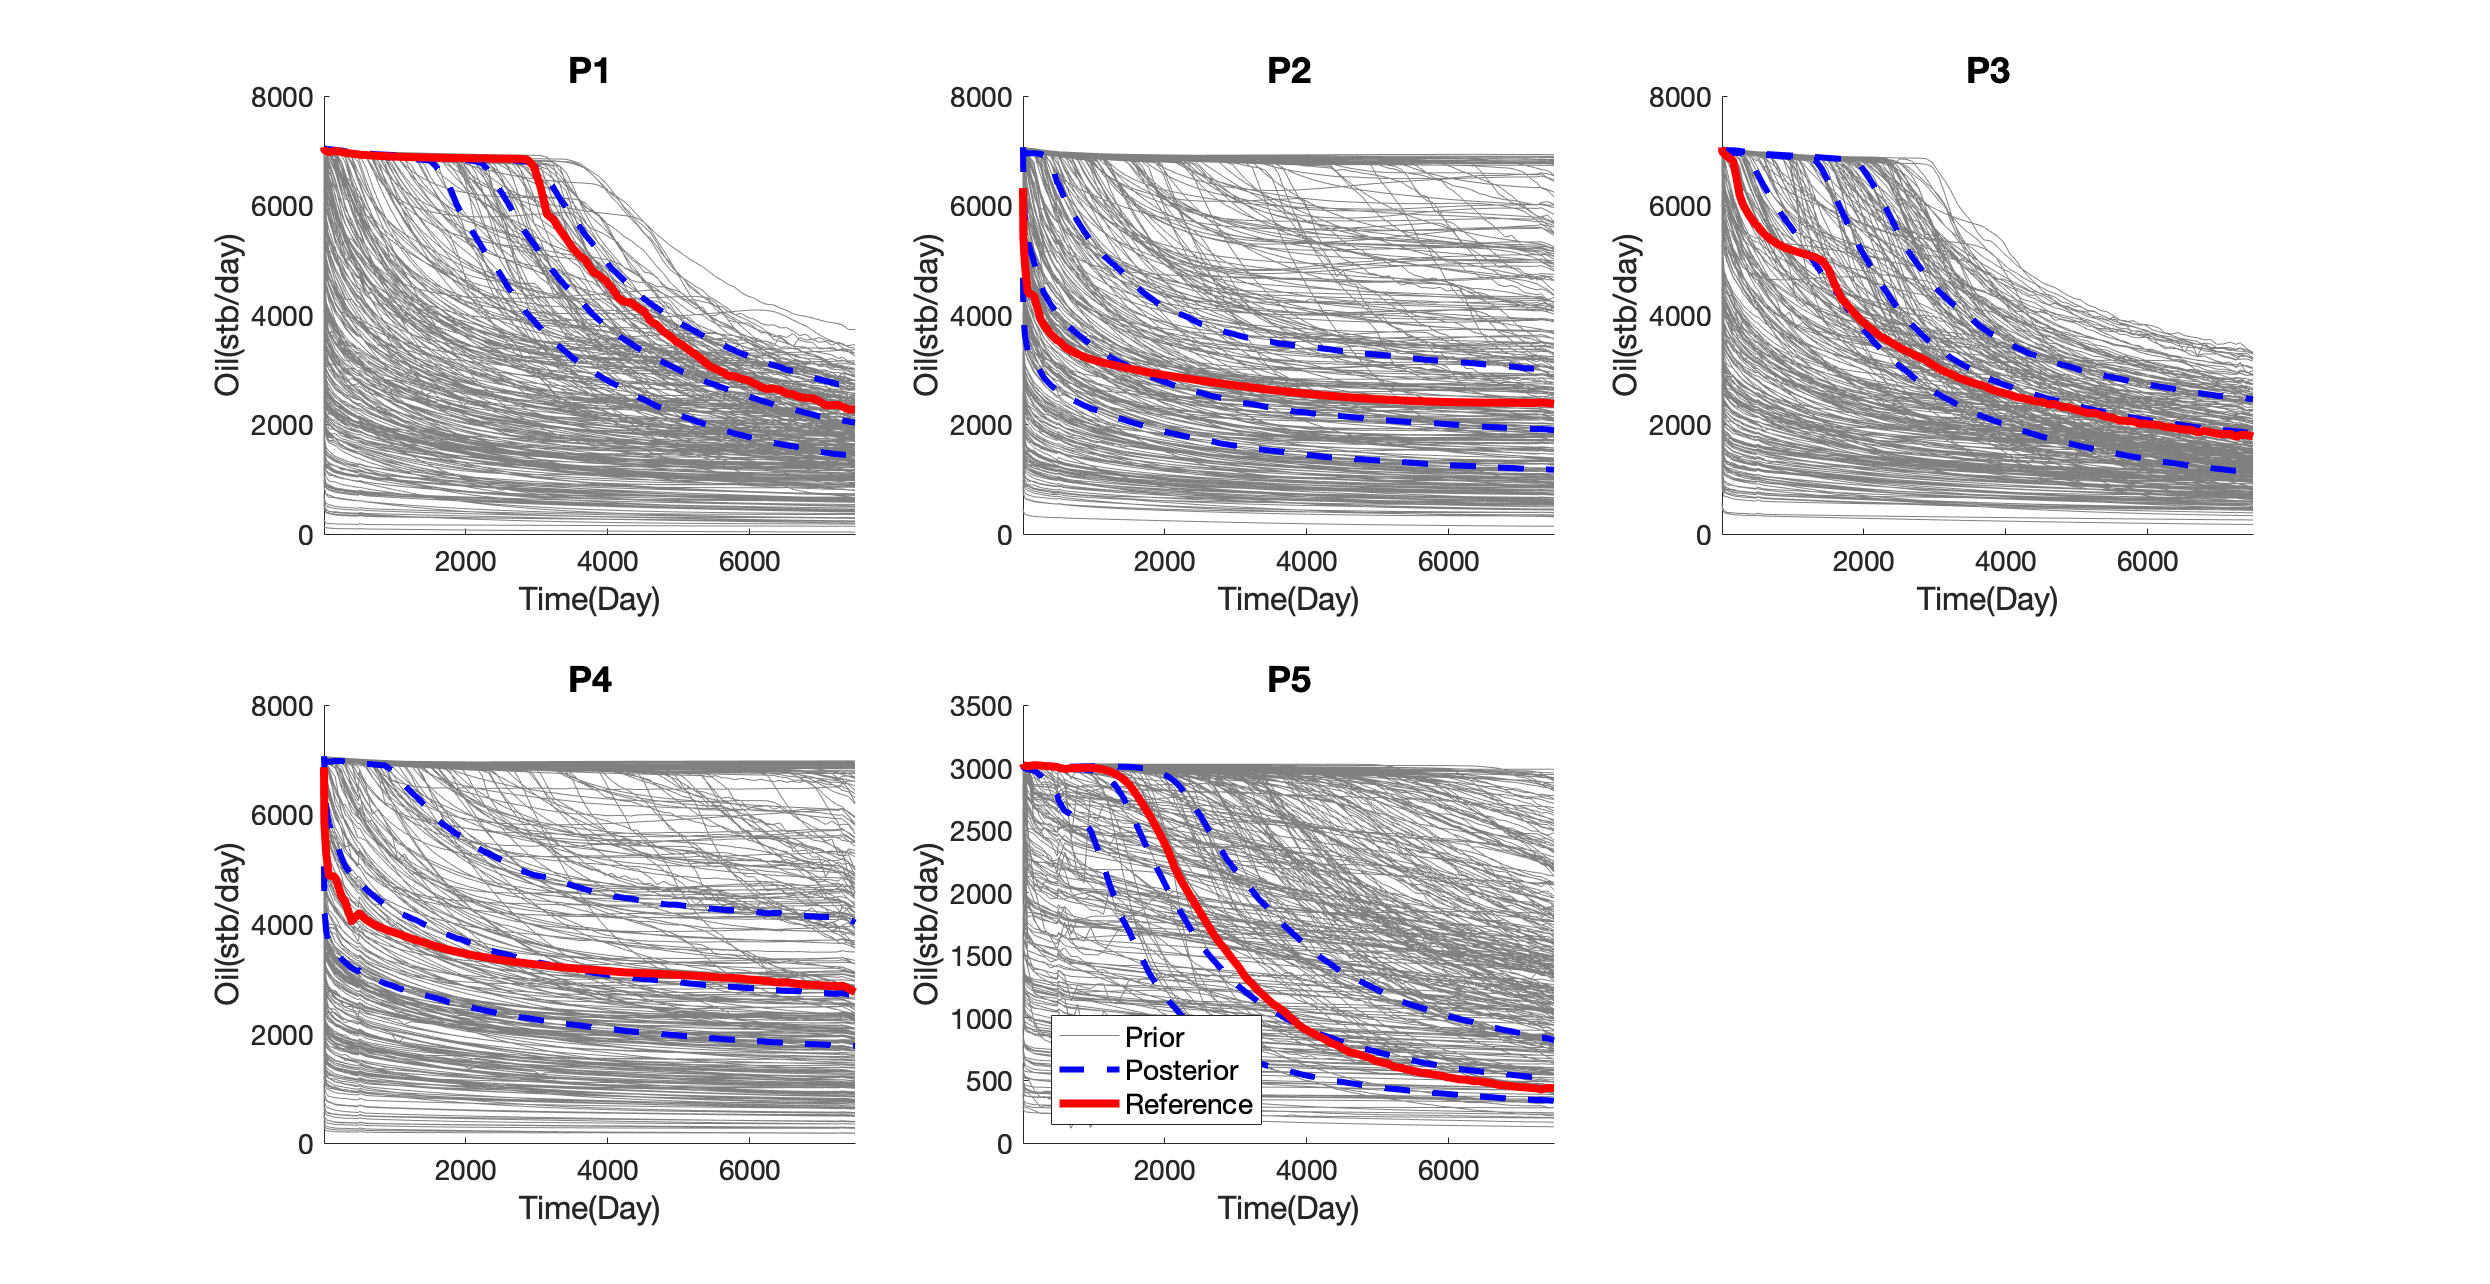

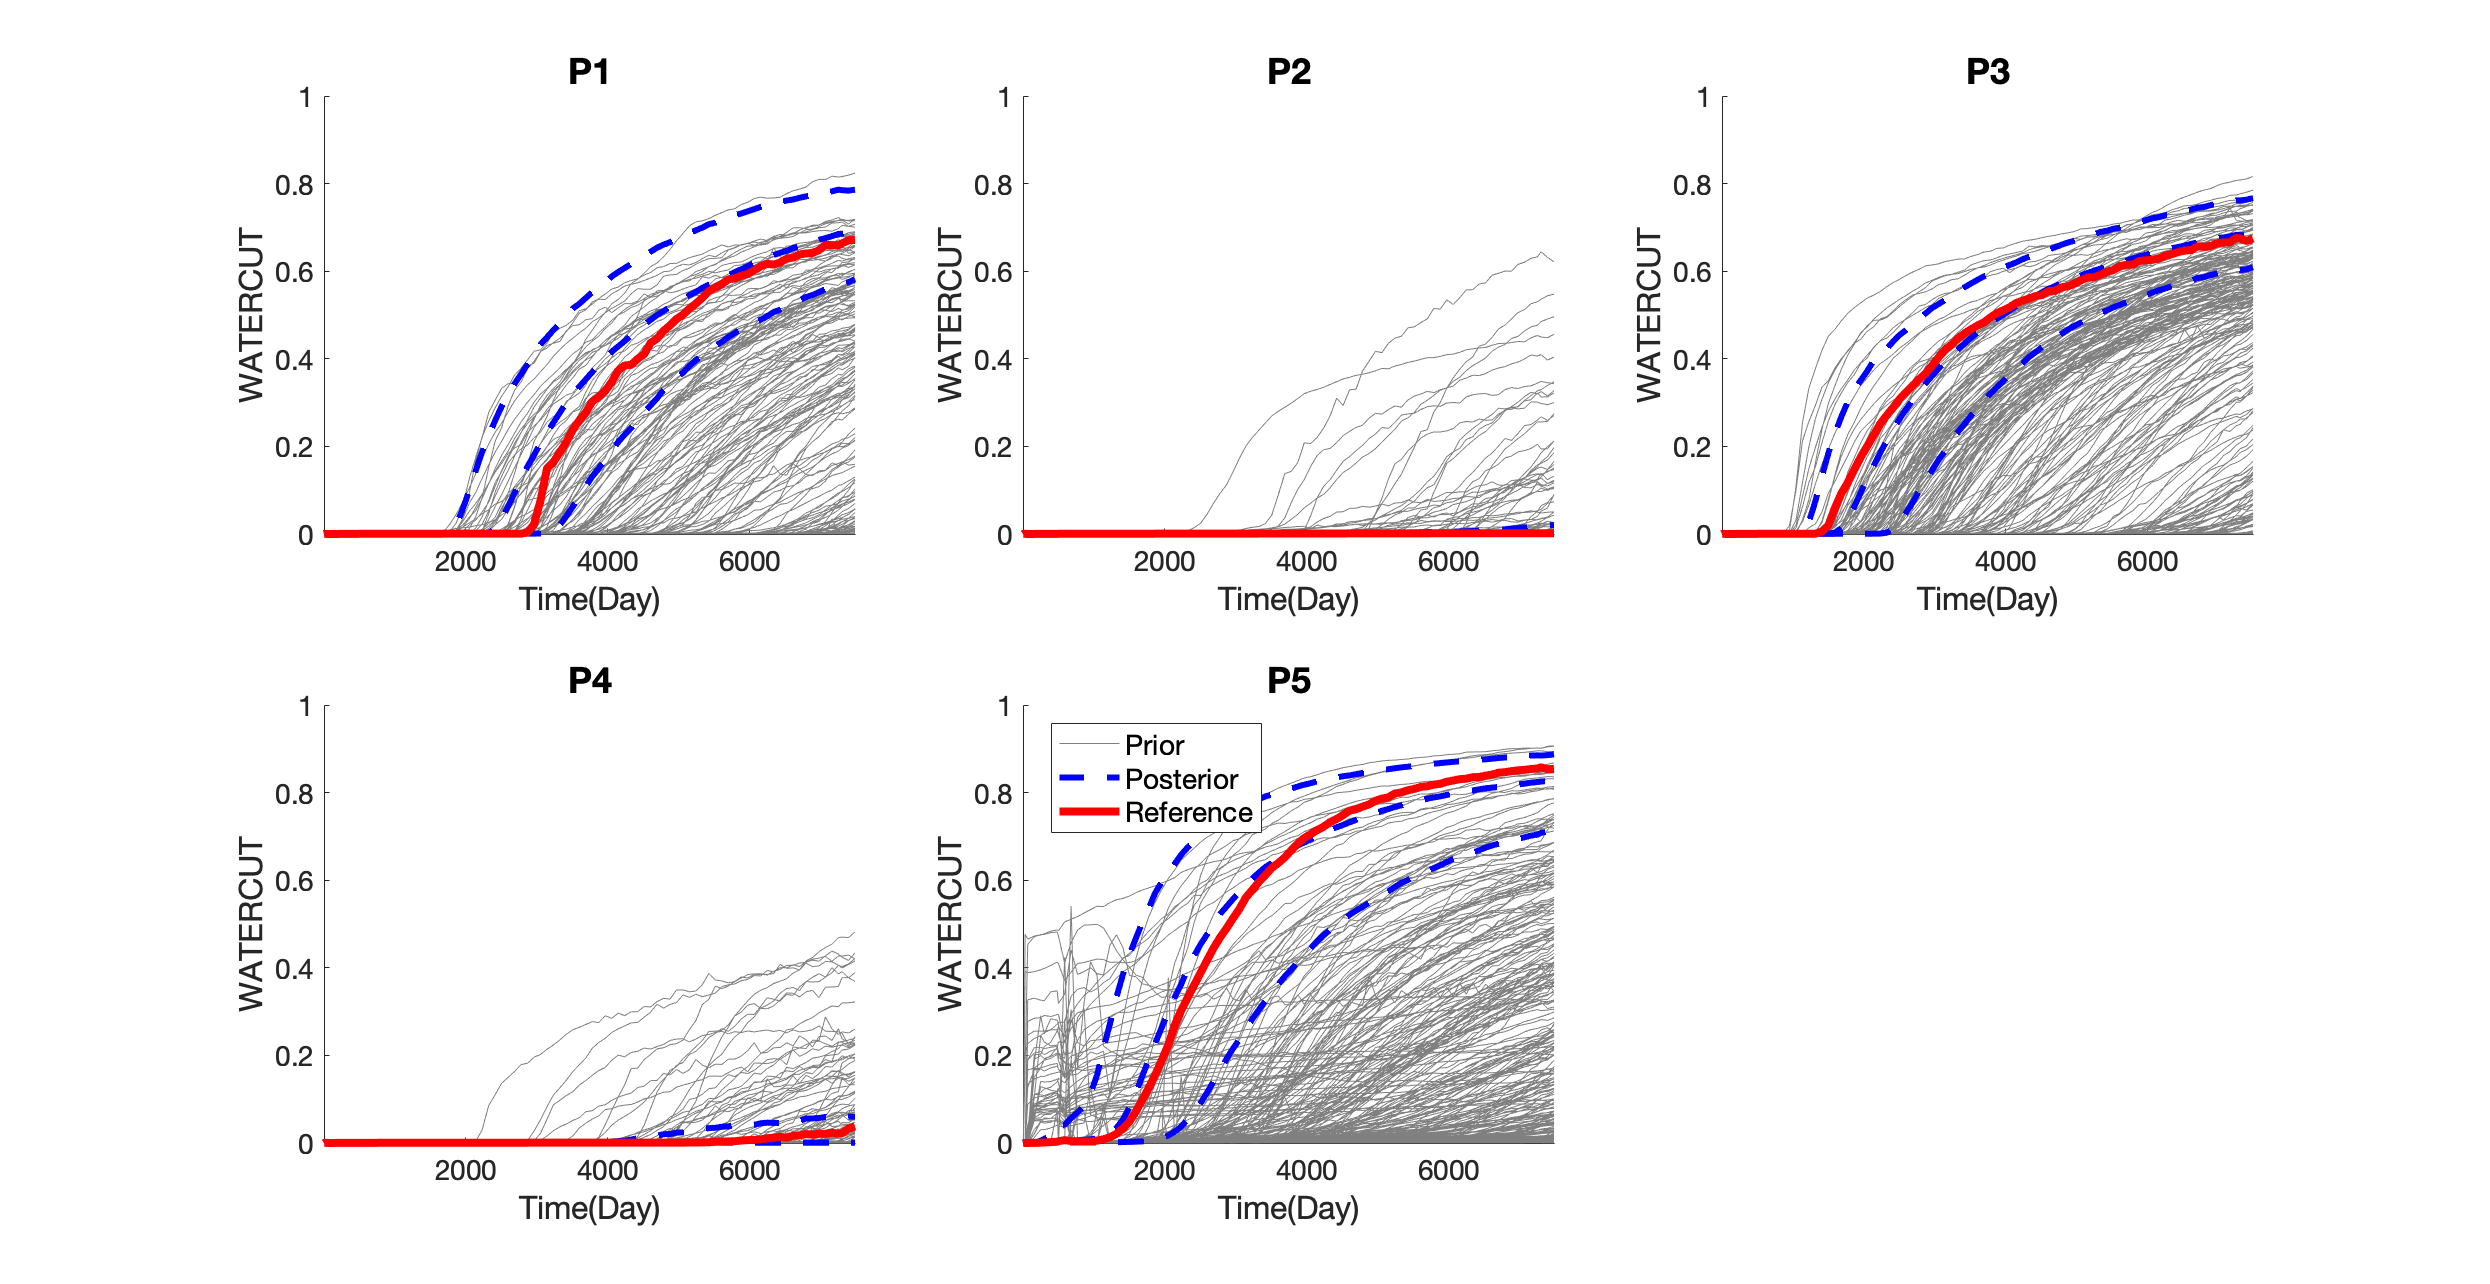

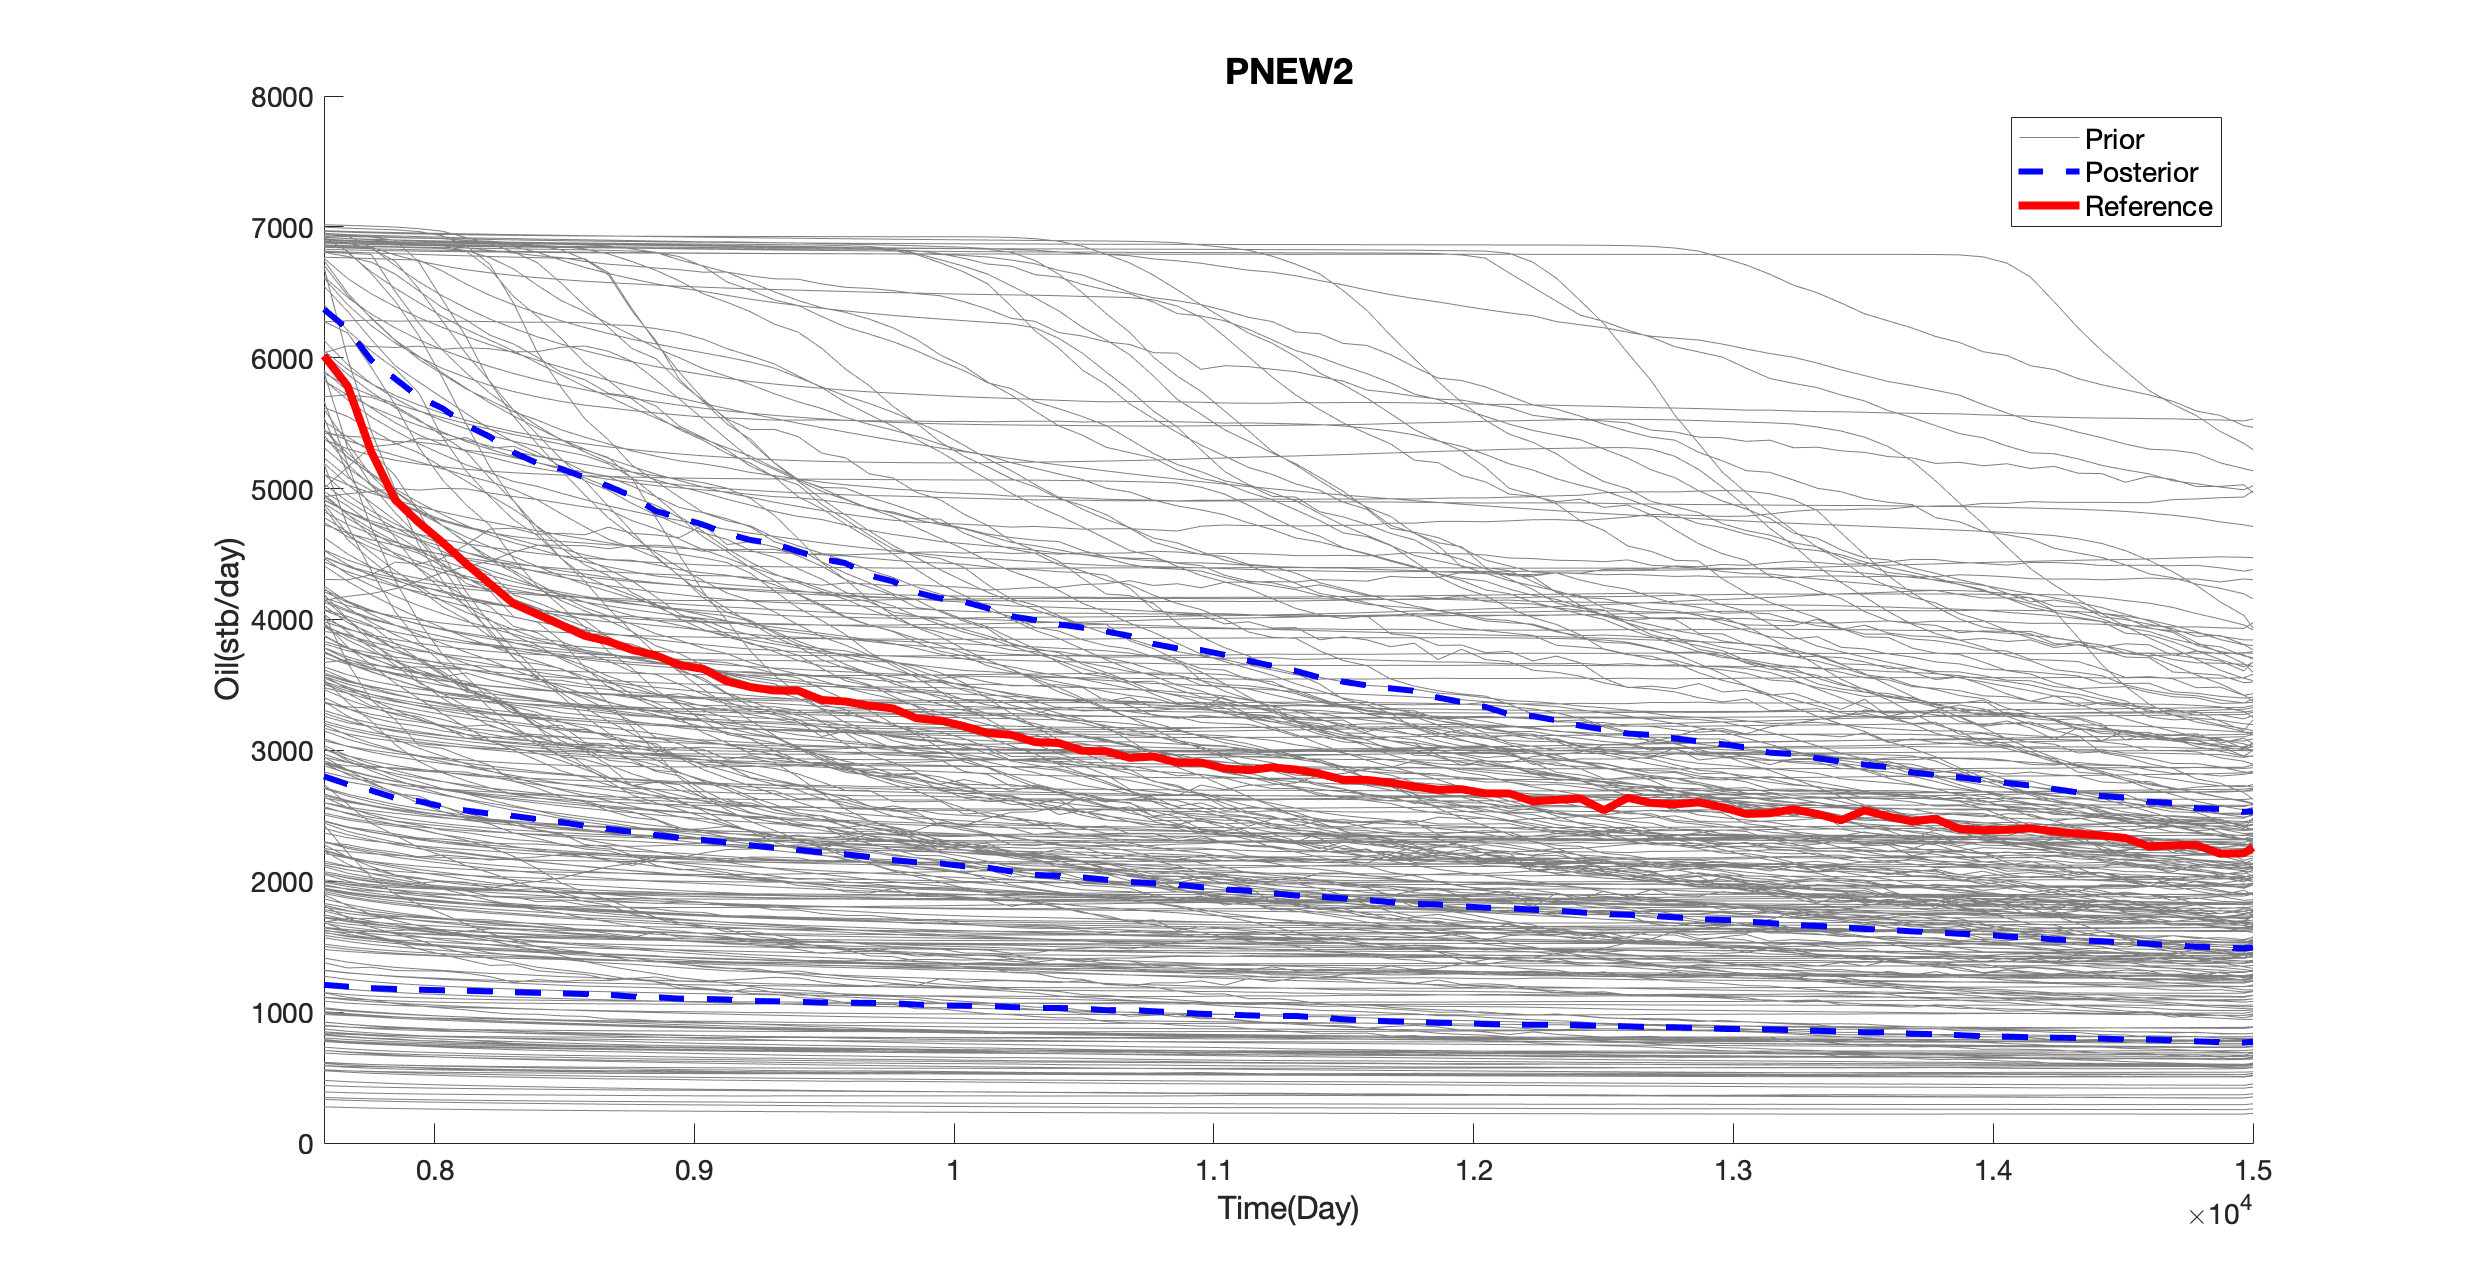

In [8]:
PlotAllResponse_Prior_PostQuantiles(ReferenceTimeStep.Data,WellNamesData,Prior.Data.Oilrate.Simulated,Posterior1.Data.Oilrate.Simulated...
    ,false,Prior.Data.Oilrate.History,2,true,'Oil(stb/day)',FigSizeResp);


PlotAllResponse_Prior_PostQuantiles(ReferenceTimeStep.Data,WellNamesData,Prior.Data.Watercut.Simulated,Posterior1.Data.Watercut.Simulated...
    ,false,Prior.Data.Watercut.History,2,true,'WATERCUT',FigSizeResp);

% Prediction variables

PlotAllResponse_Prior_PostQuantiles(ReferenceTimeStep.Prediction,WellNamesPrediction,Prior.Prediction.Oilrate.Simulated,Posterior1.Prediction.Oilrate.Simulated...
    ,false,Prior.Prediction.Oilrate.History,1,true,'Oil(stb/day)',FigSizeResp);

# Results of last (4th) iteration

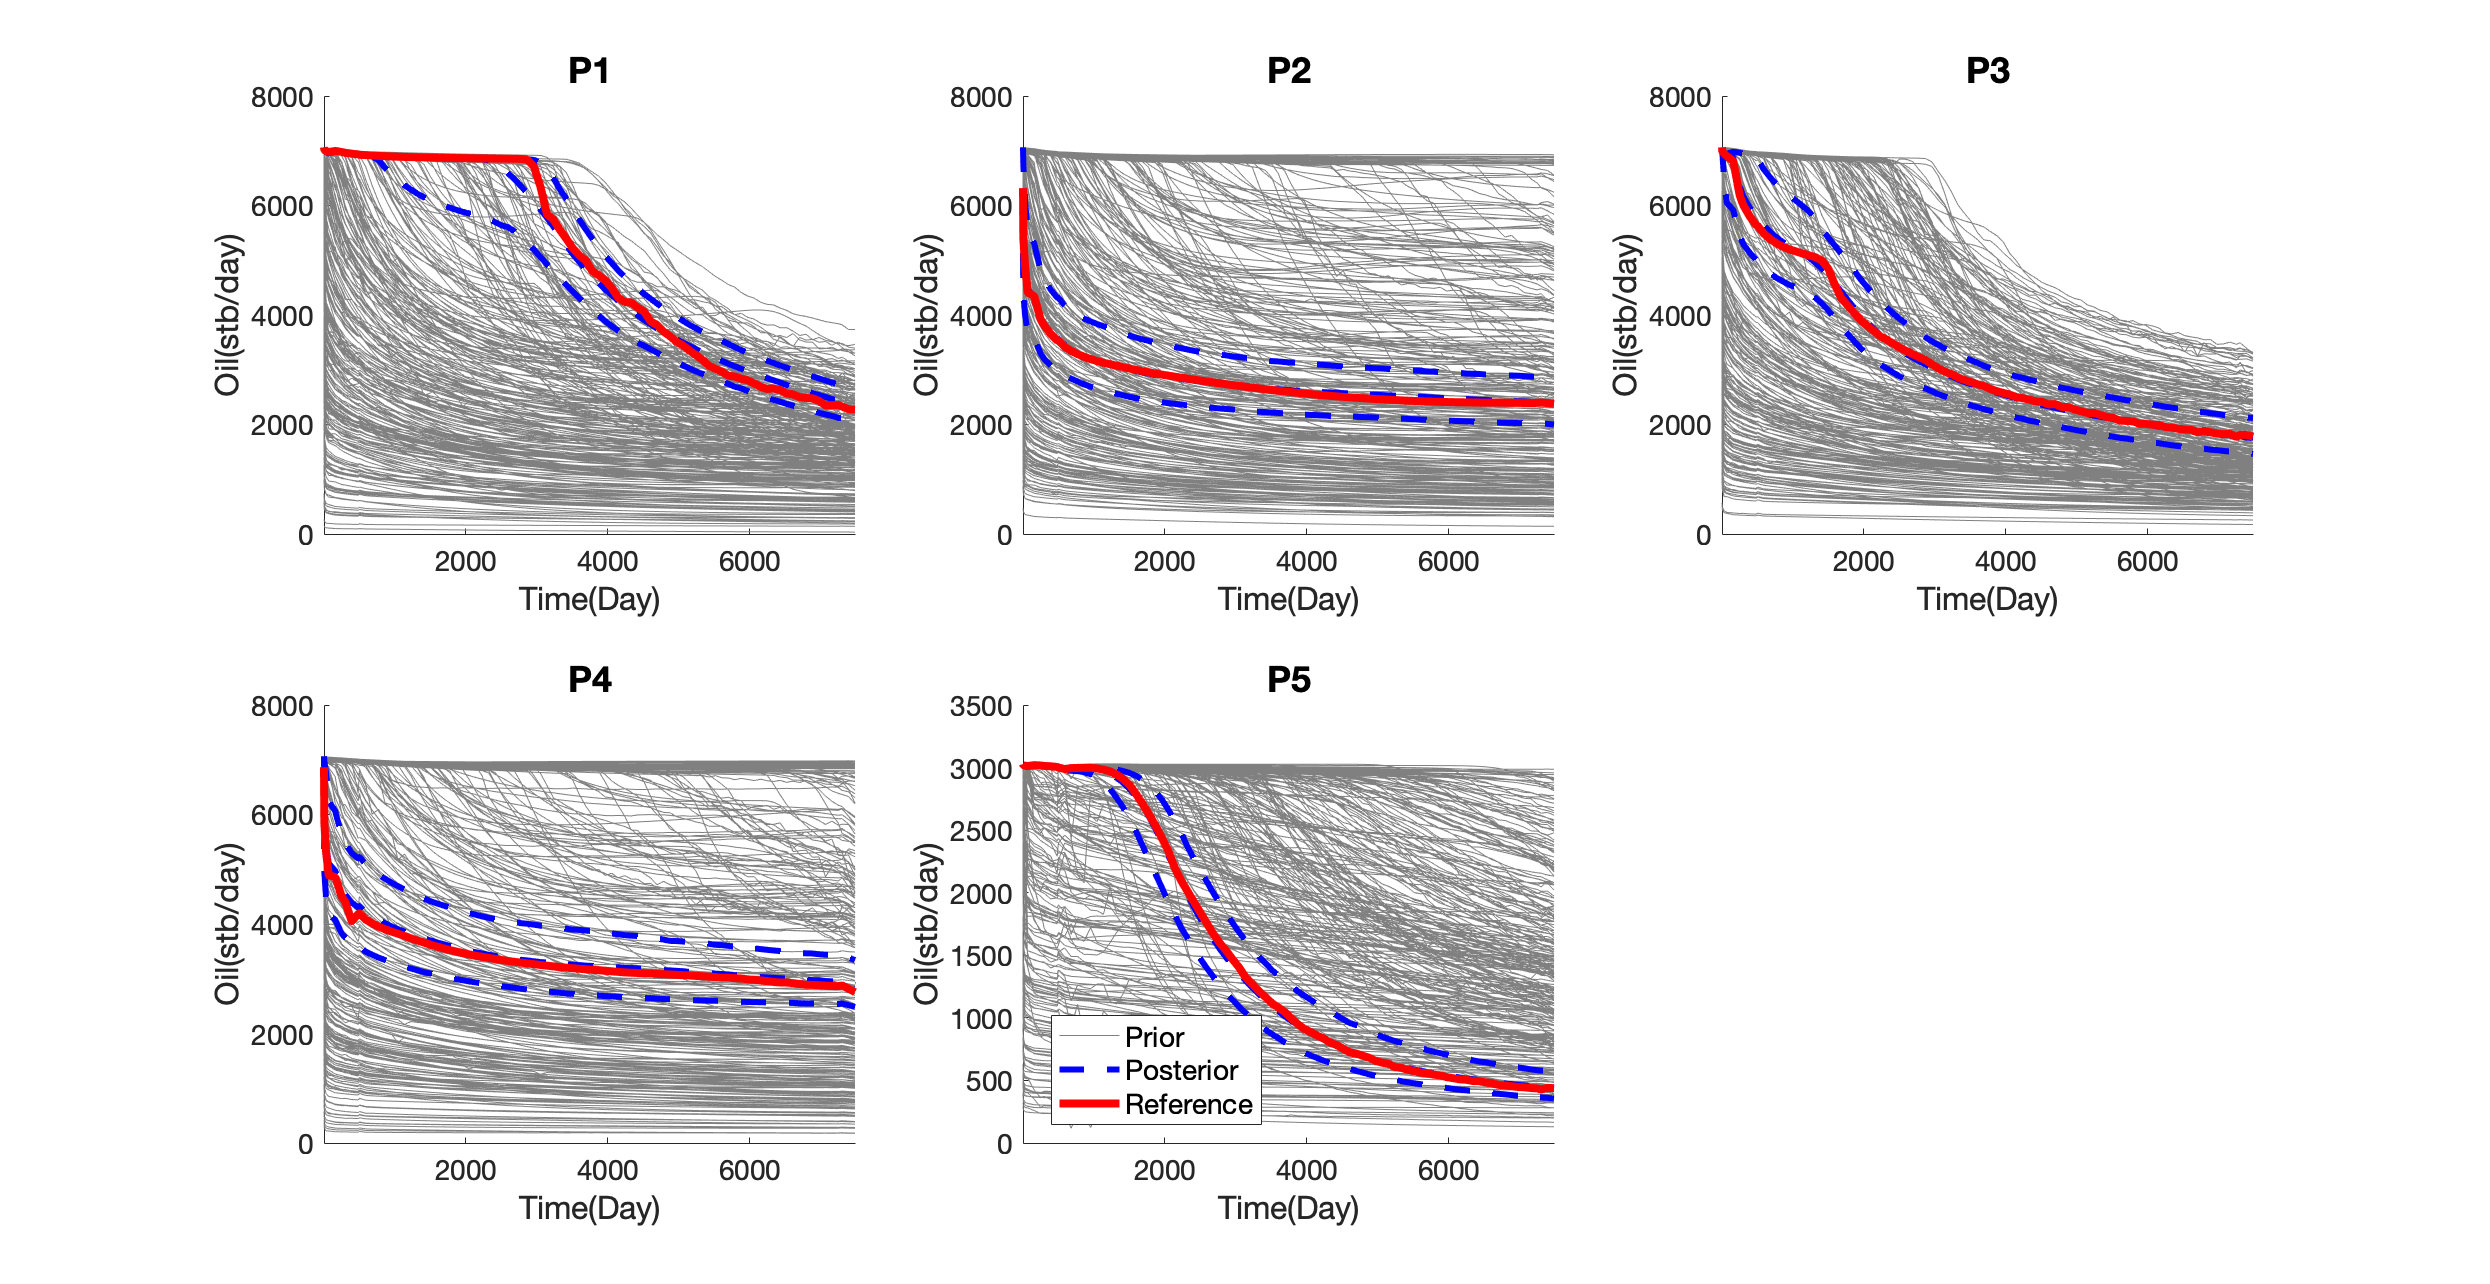

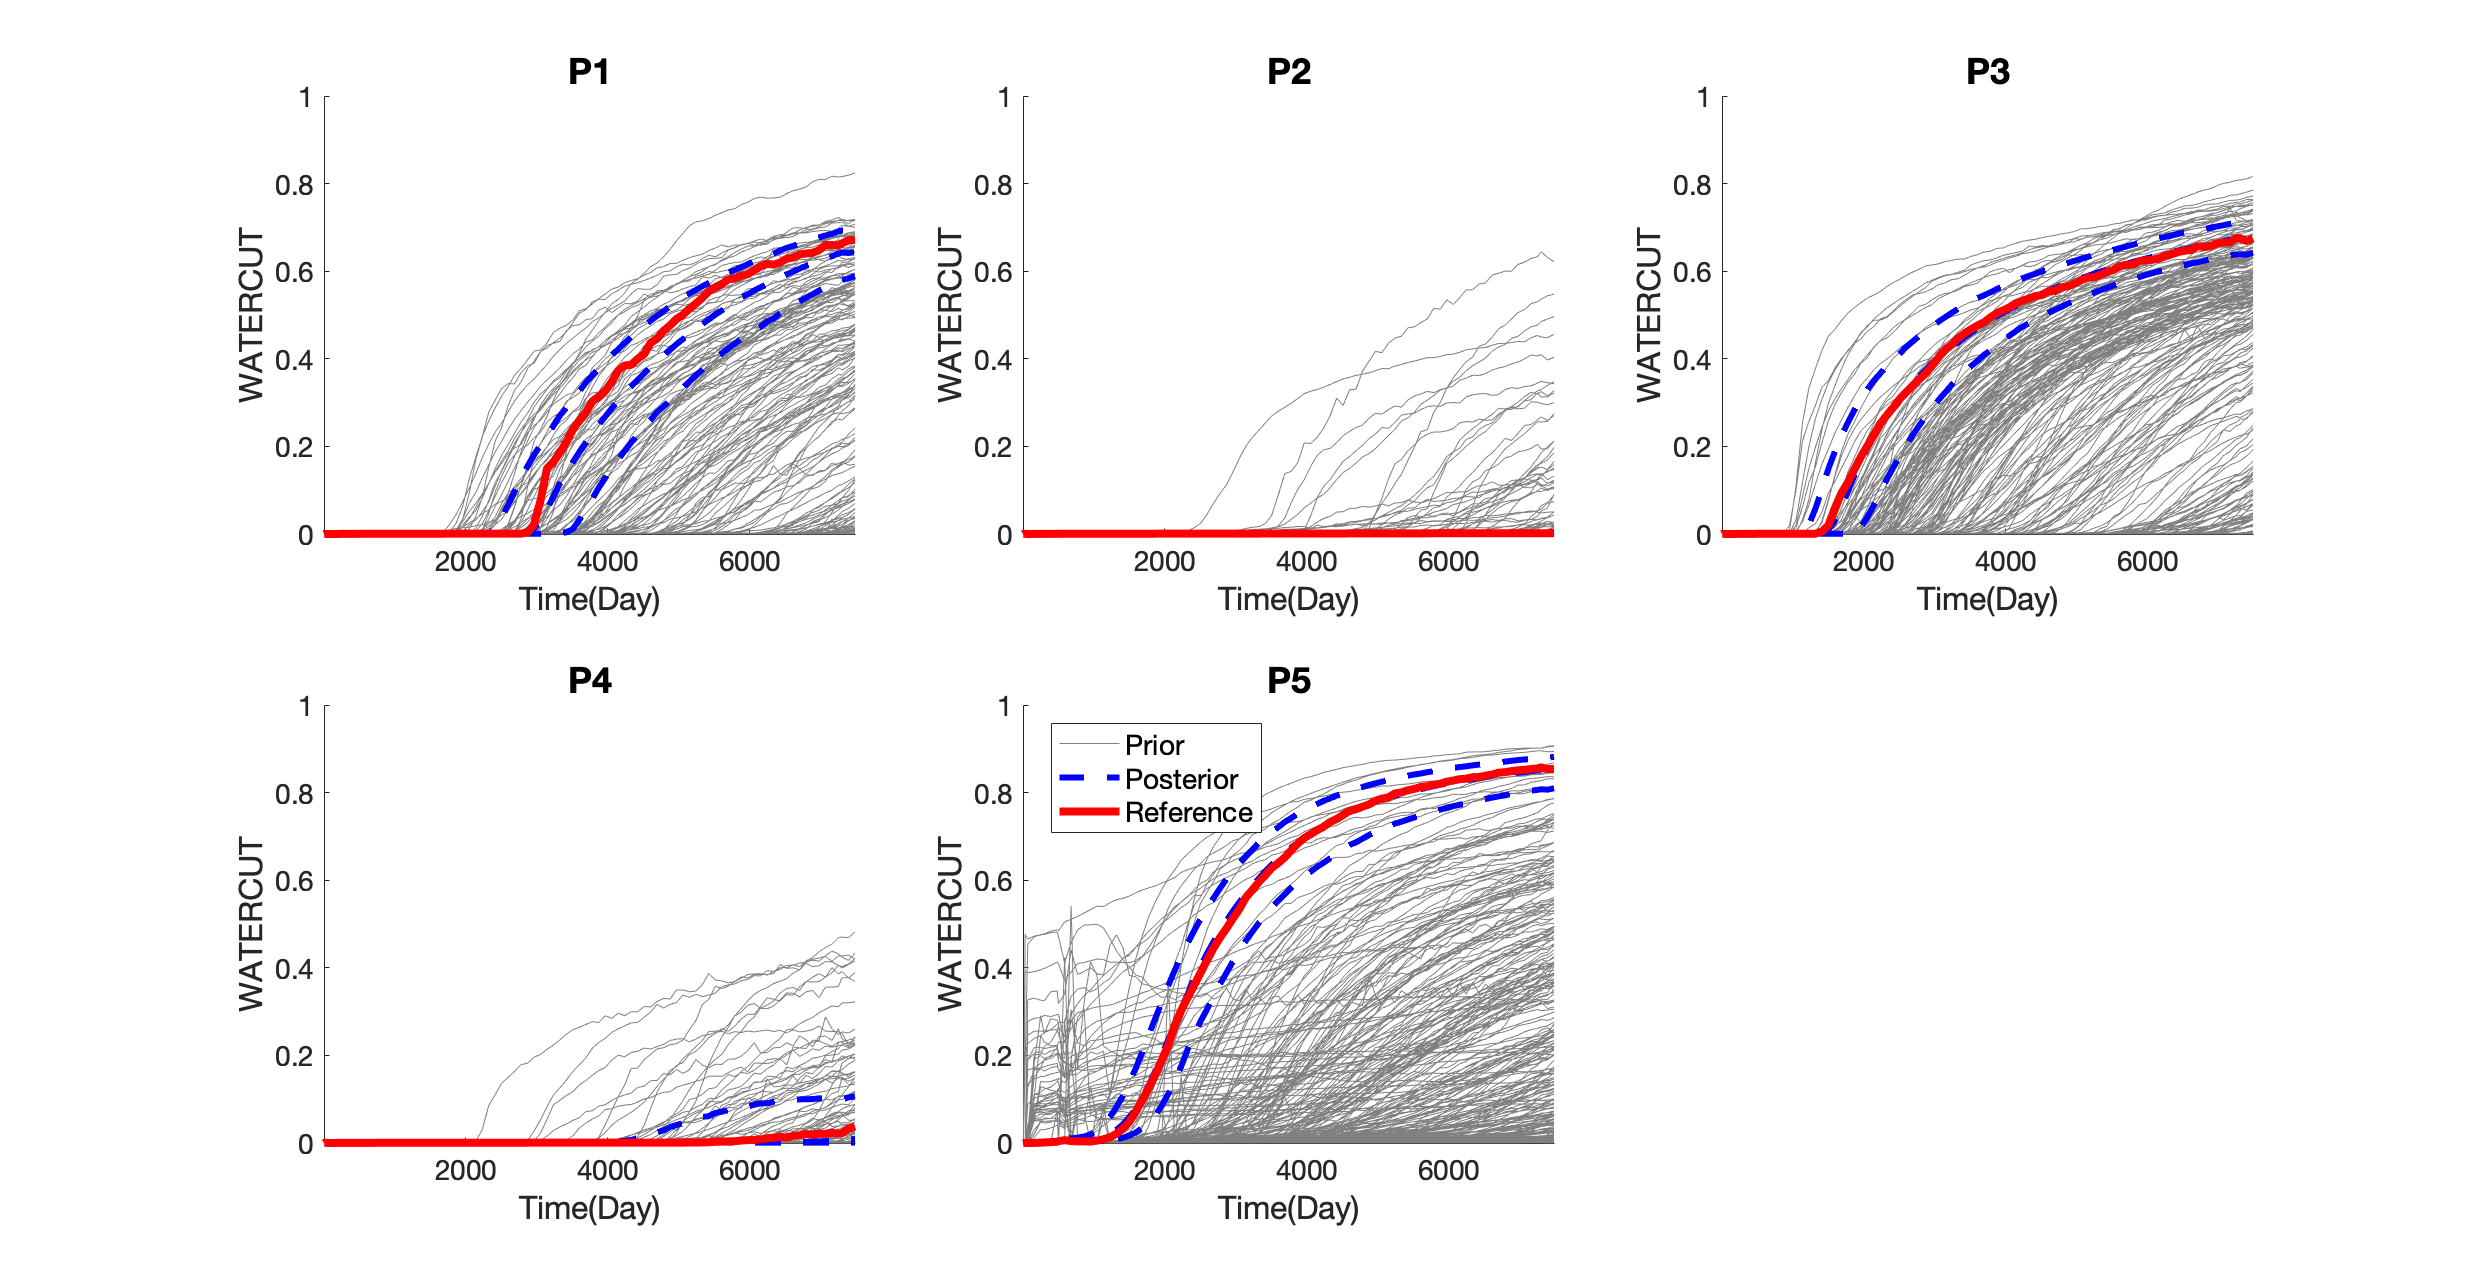

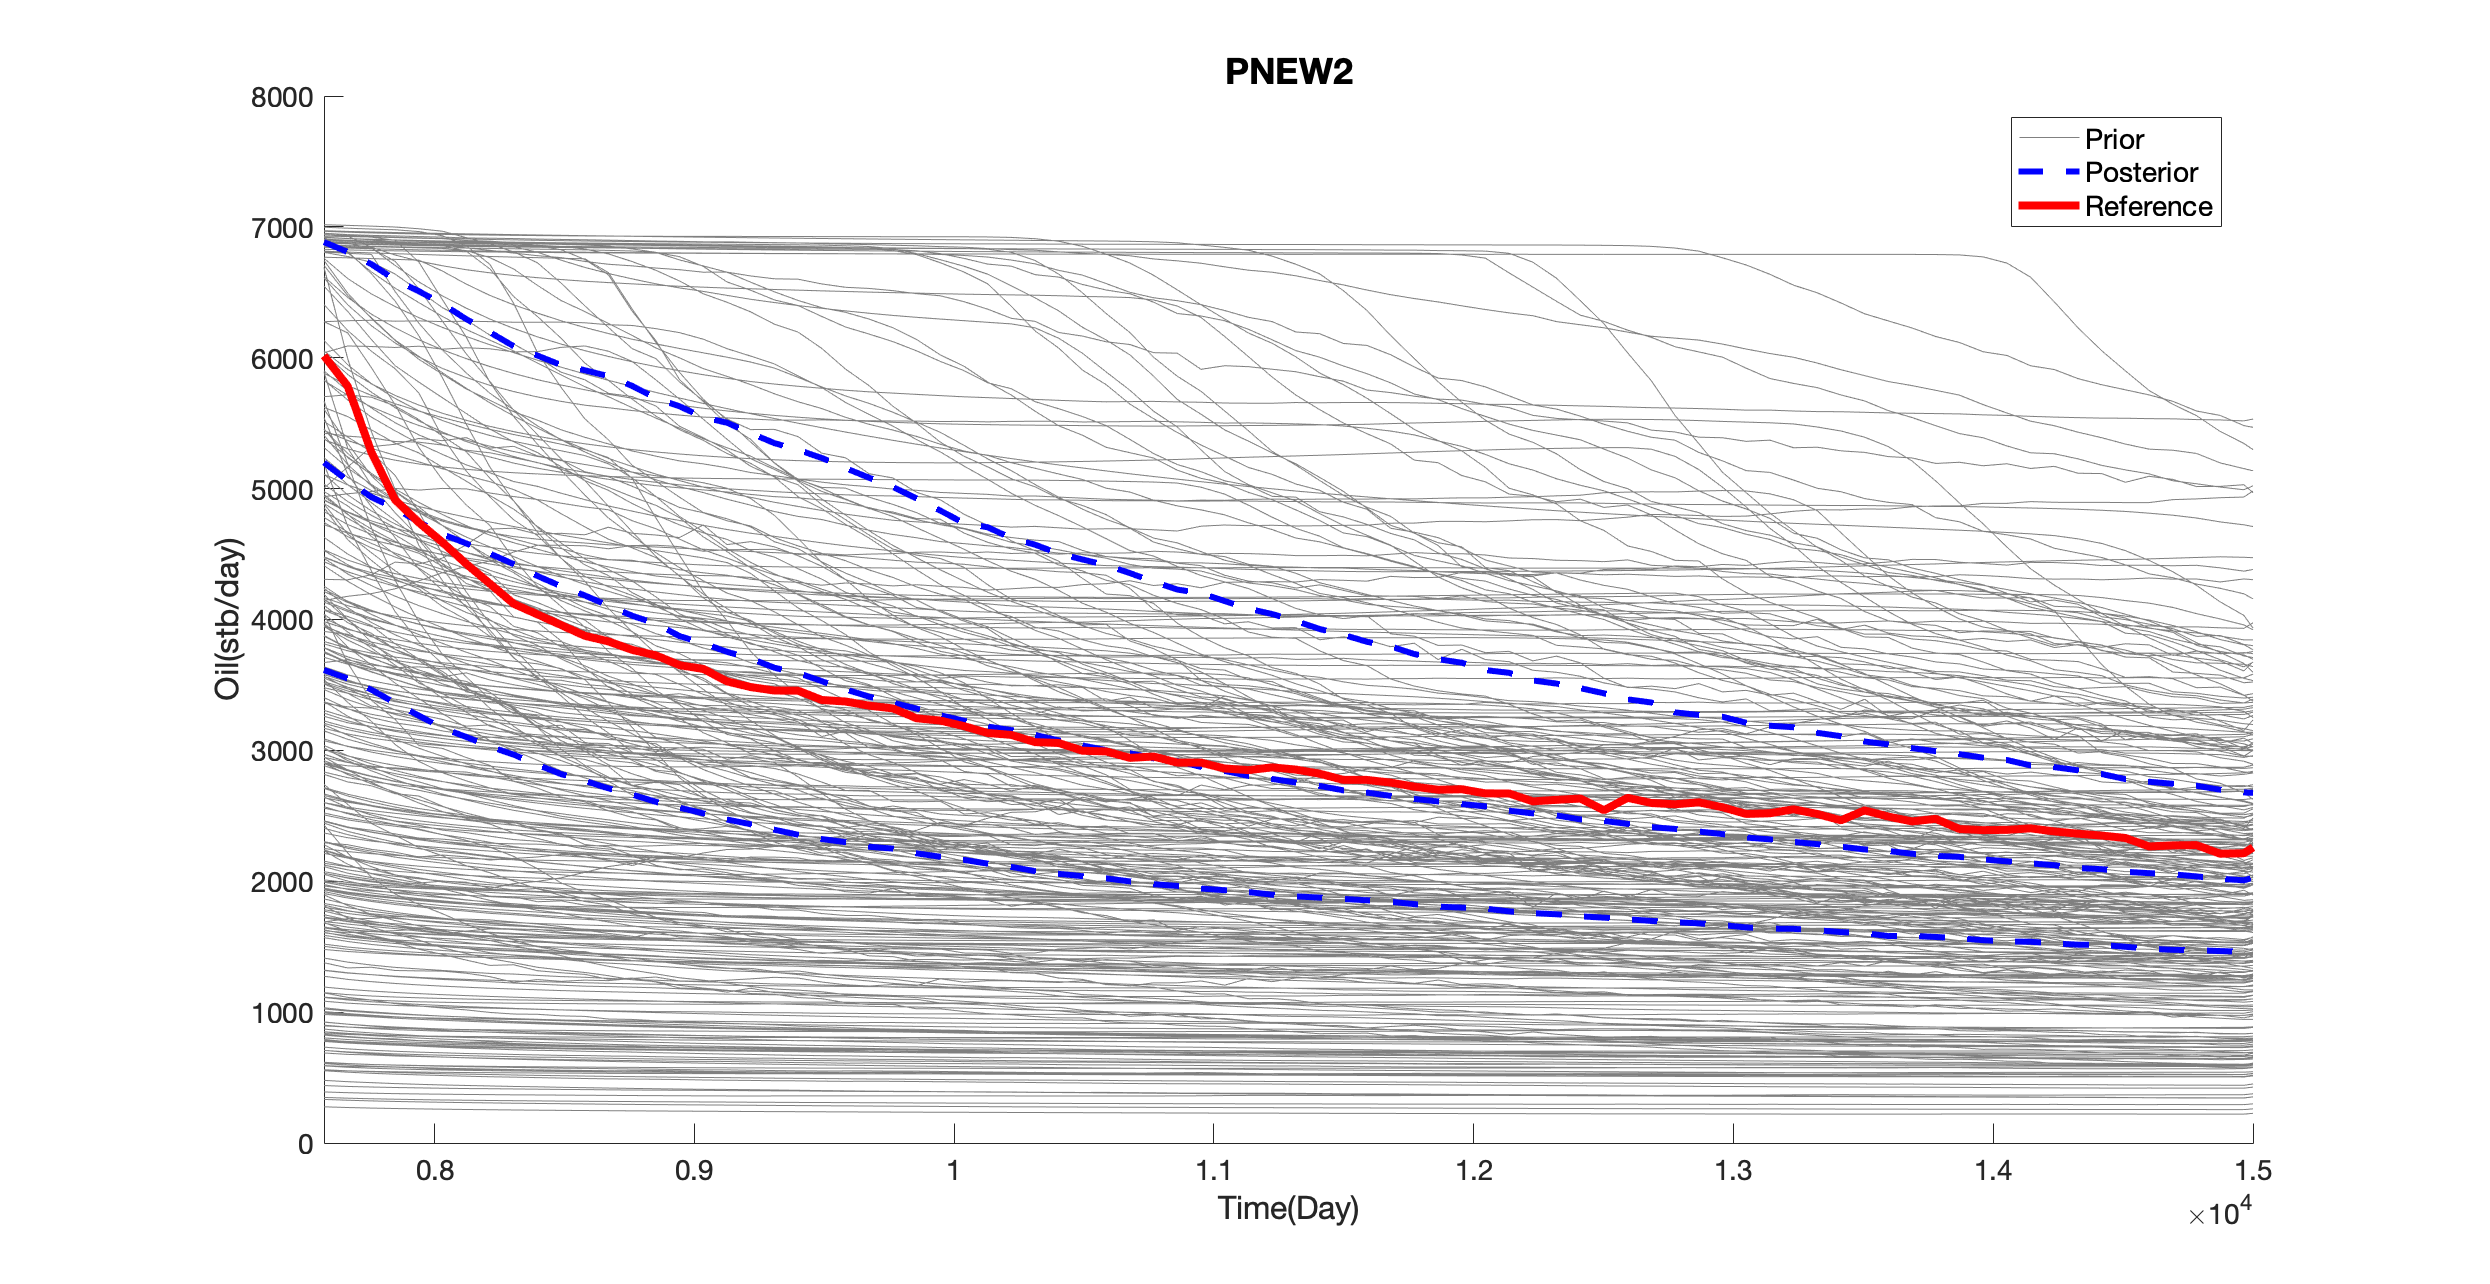

In [9]:
ReferenceNumberPosterior4 = 1;
load('SimulationResults_Iter4.mat')

% Data variable, Oil rate
[Posterior4DataOilrate,Posterior4DataTimeStep]=Convert_3DSL_Response(Data,Index.Oilrate,WellNamesData,ReferenceTimeStep.Data,Index.Time);
Posterior4DataWatercut = Convert_3DSL_Response(Data,Index.Watercut,WellNamesData,ReferenceTimeStep.Data,Index.Time);
Posterior4DataWatercut = Posterior4DataWatercut/100;

[Posterior4PredictionOilrate,Posterior4PredictionTimeStep] = ...
    Convert_3DSL_Response(Data,Index.Oilrate,WellNamesPrediction,ReferenceTimeStep.Prediction,Index.Time);

% Split data variables
[Posterior4.Data.Oilrate.History,Posterior4.Data.Oilrate.Simulated] = SplitDataObservedSimulated(Posterior4DataOilrate,ReferenceNumberPosterior4);
[Posterior4.Data.Watercut.History,Posterior4.Data.Watercut.Simulated] = SplitDataObservedSimulated(Posterior4DataWatercut, ReferenceNumberPosterior4);

% Split prediction variables
[Posterior4.Prediction.Oilrate.History,Posterior4.Prediction.Oilrate.Simulated] = SplitDataObservedSimulated(Posterior4PredictionOilrate,ReferenceNumberPosterior4);

% Plotting: Prior, Iteration1

PlotAllResponse_Prior_PostQuantiles(ReferenceTimeStep.Data,WellNamesData,Prior.Data.Oilrate.Simulated,Posterior4.Data.Oilrate.Simulated...
    ,false,Prior.Data.Oilrate.History,2,true,'Oil(stb/day)',FigSizeResp);


PlotAllResponse_Prior_PostQuantiles(ReferenceTimeStep.Data,WellNamesData,Prior.Data.Watercut.Simulated,Posterior4.Data.Watercut.Simulated...
    ,false,Prior.Data.Watercut.History,2,true,'WATERCUT',FigSizeResp);

% Prediction variables

PlotAllResponse_Prior_PostQuantiles(ReferenceTimeStep.Prediction,WellNamesPrediction,Prior.Prediction.Oilrate.Simulated,Posterior4.Prediction.Oilrate.Simulated...
    ,false,Prior.Prediction.Oilrate.History,1,true,'Oil(stb/day)',FigSizeResp);

## Post processing of data and prediction variables (4th iteration)

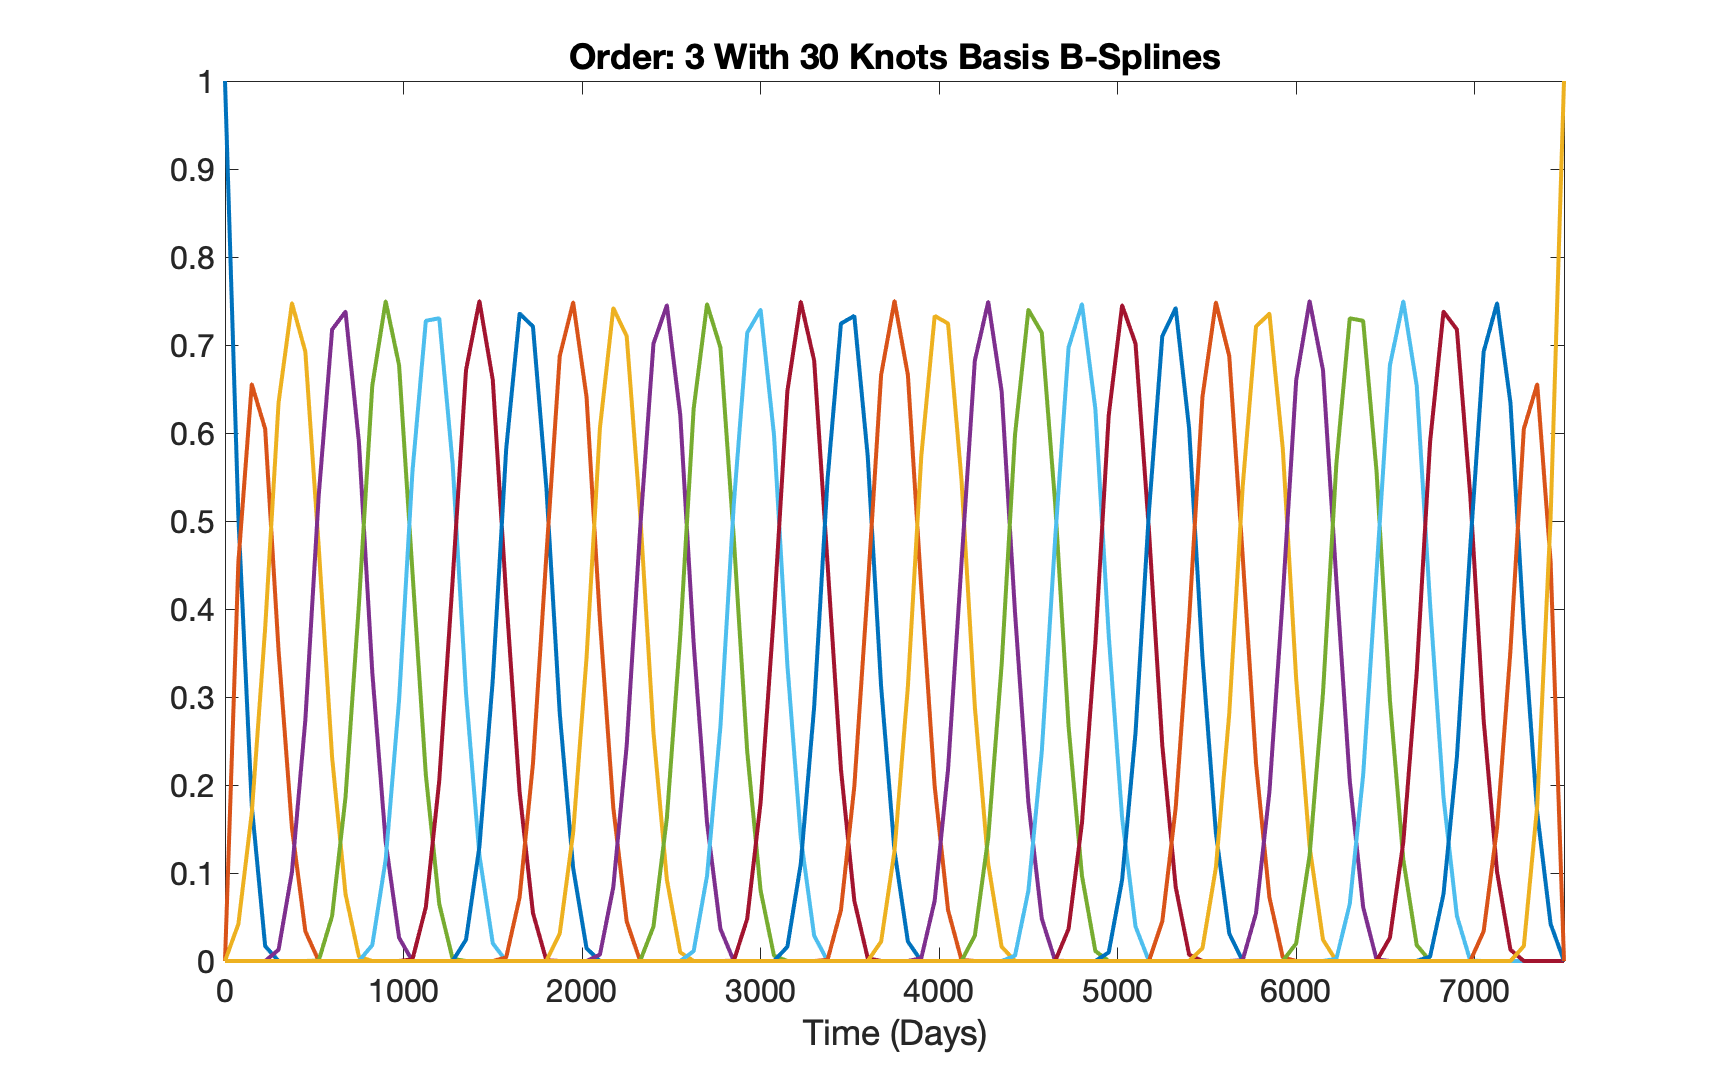

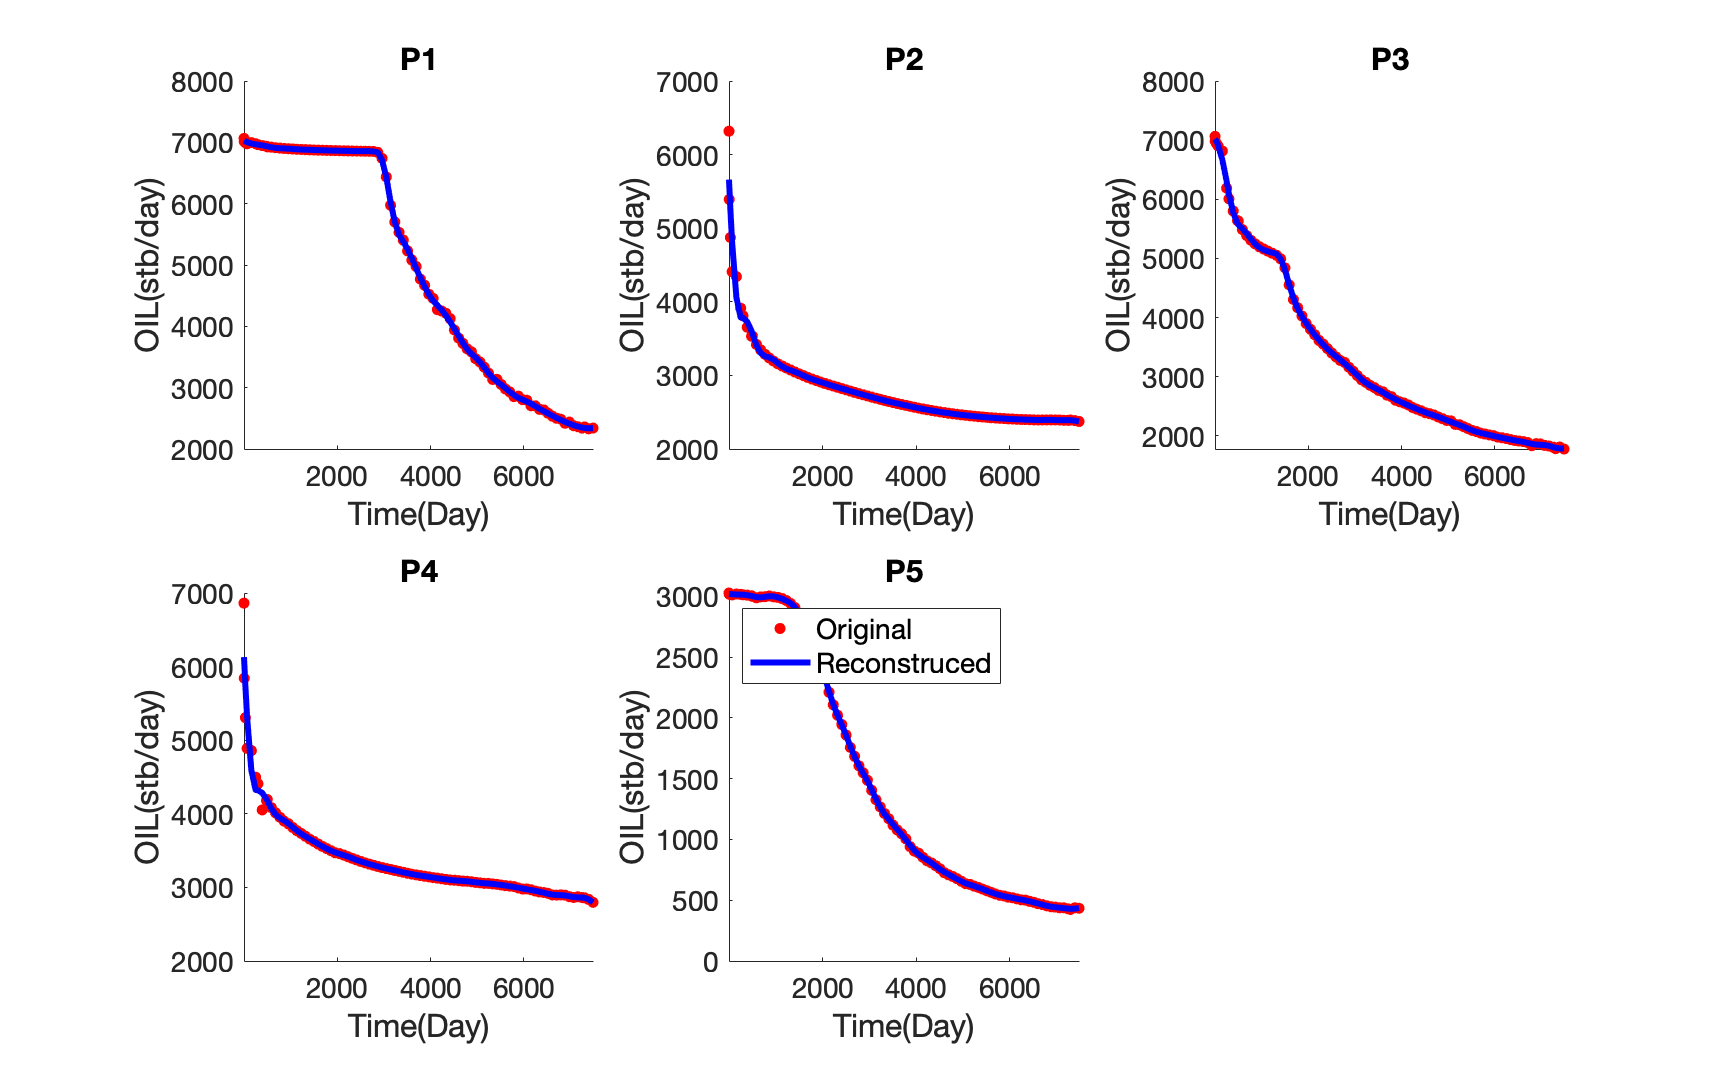

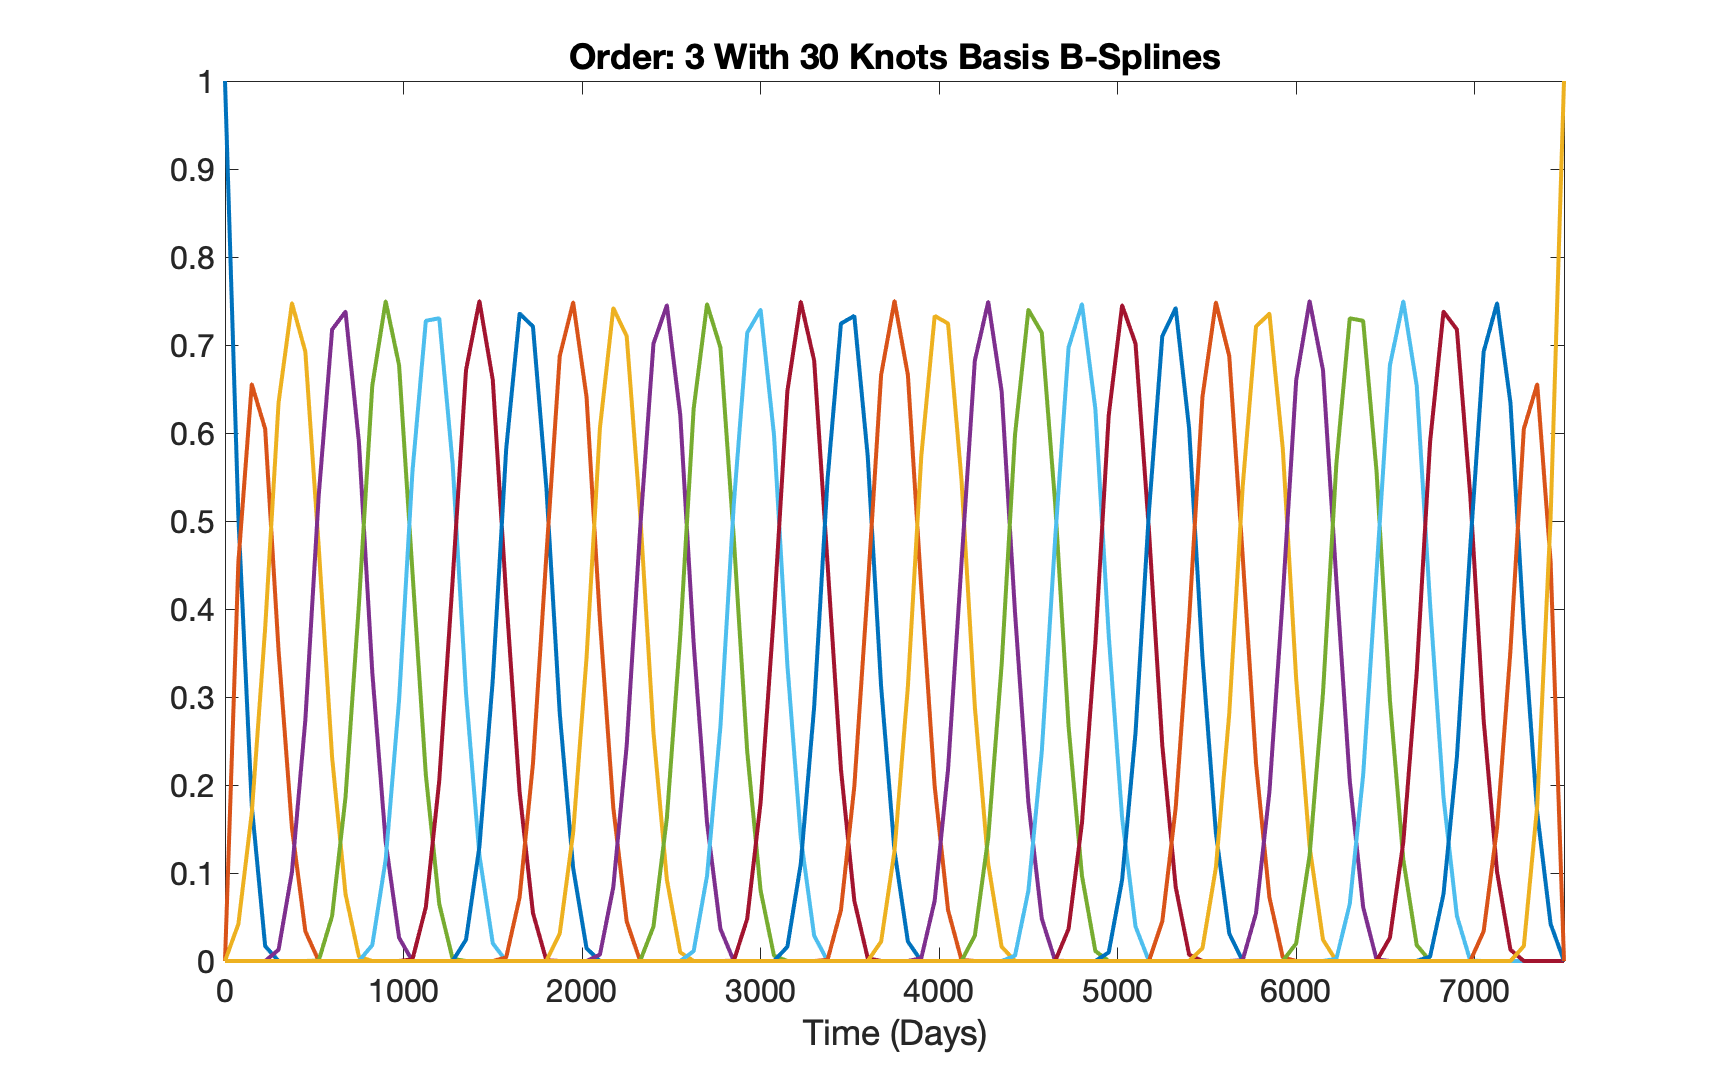

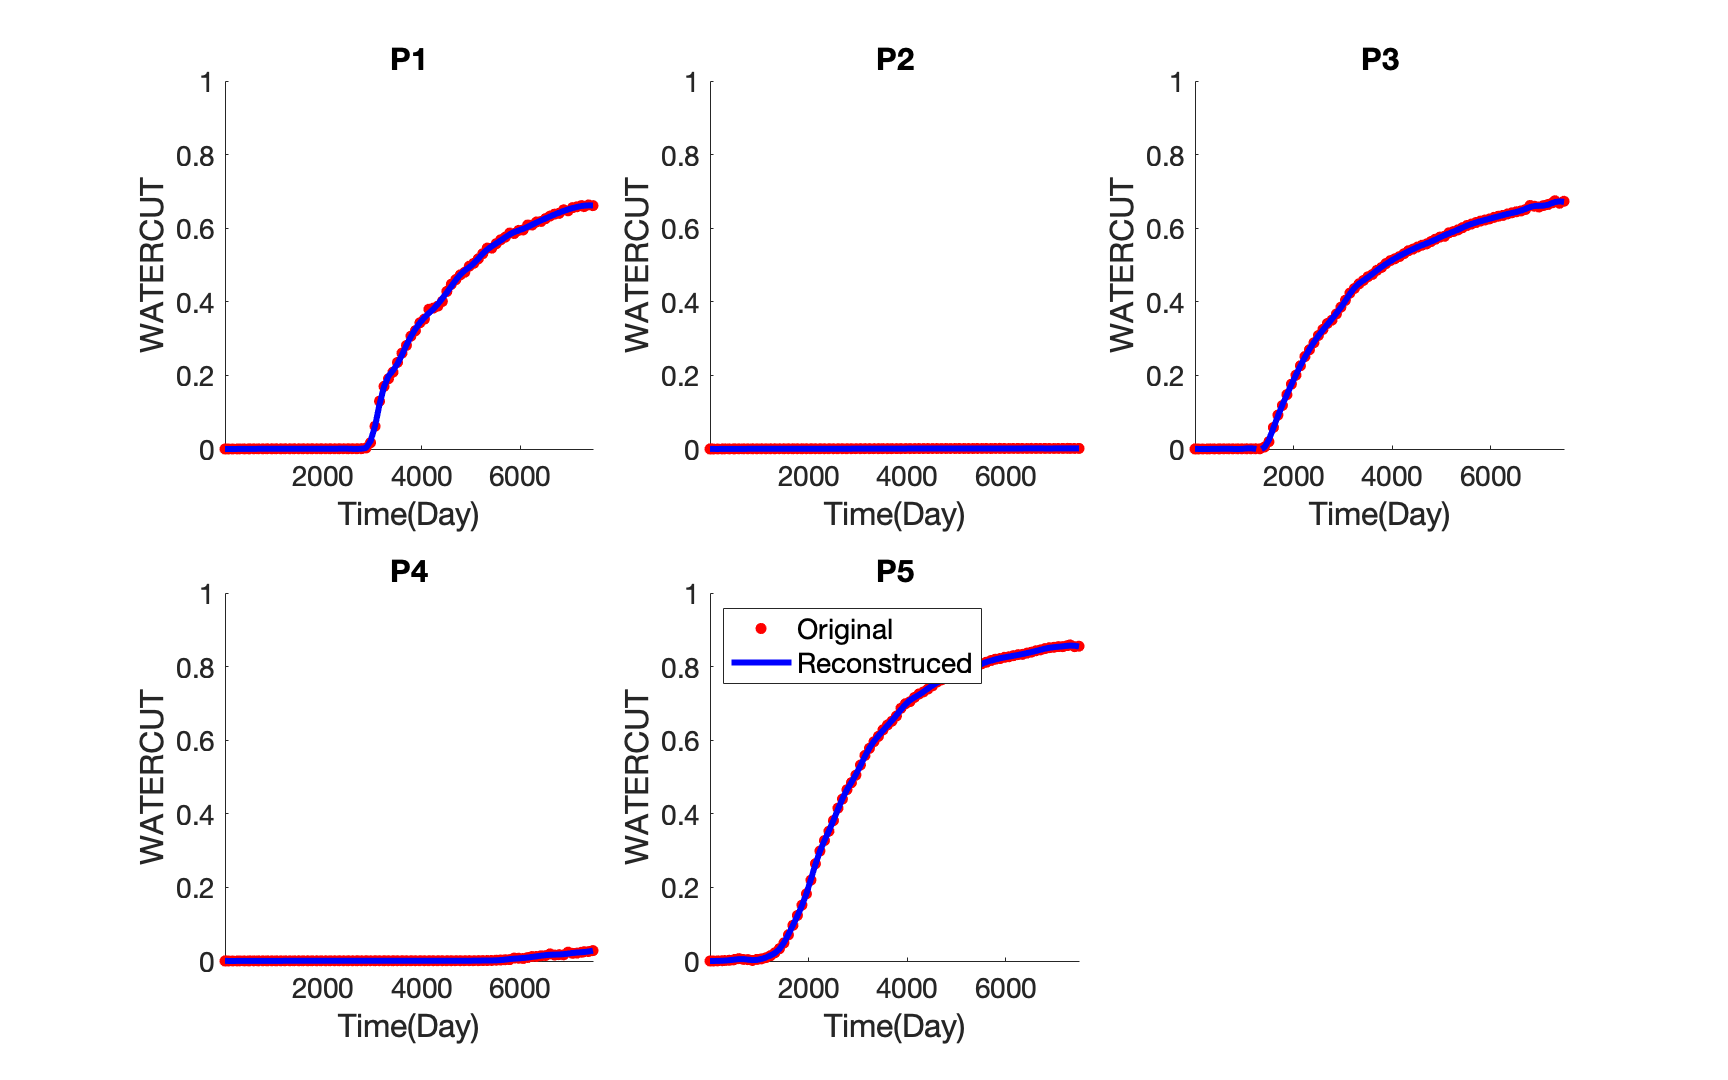

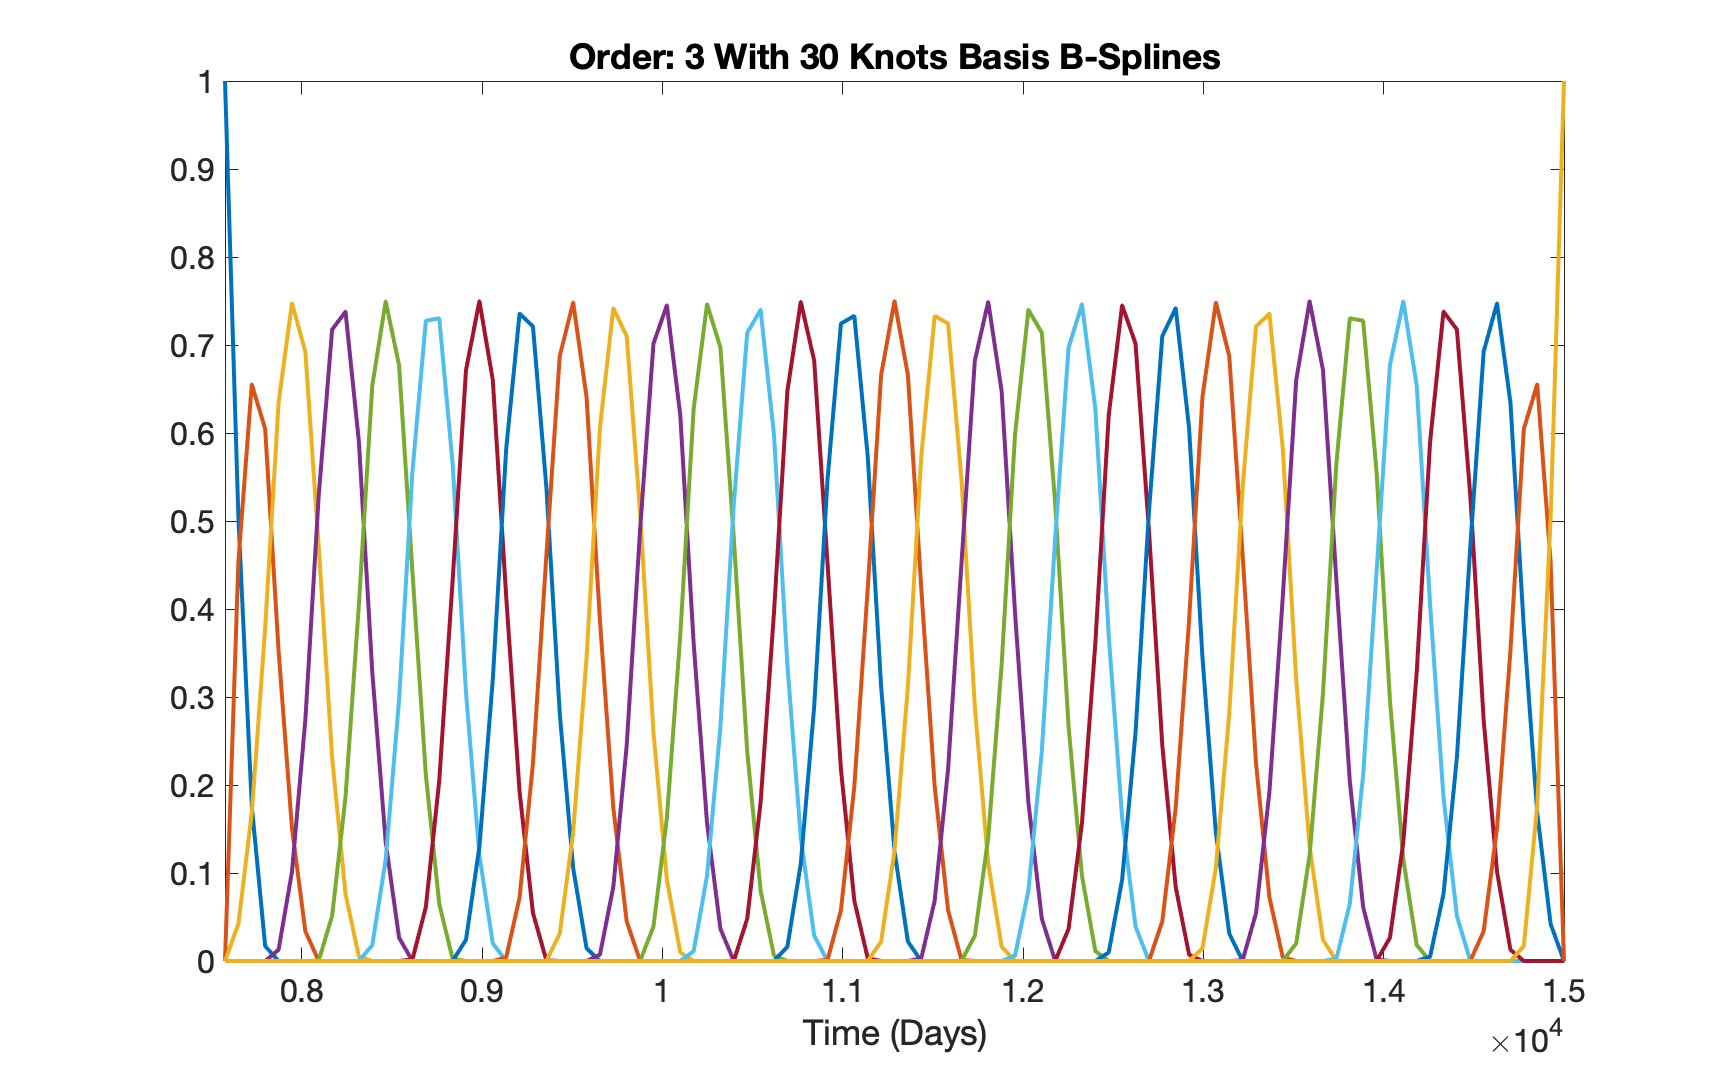

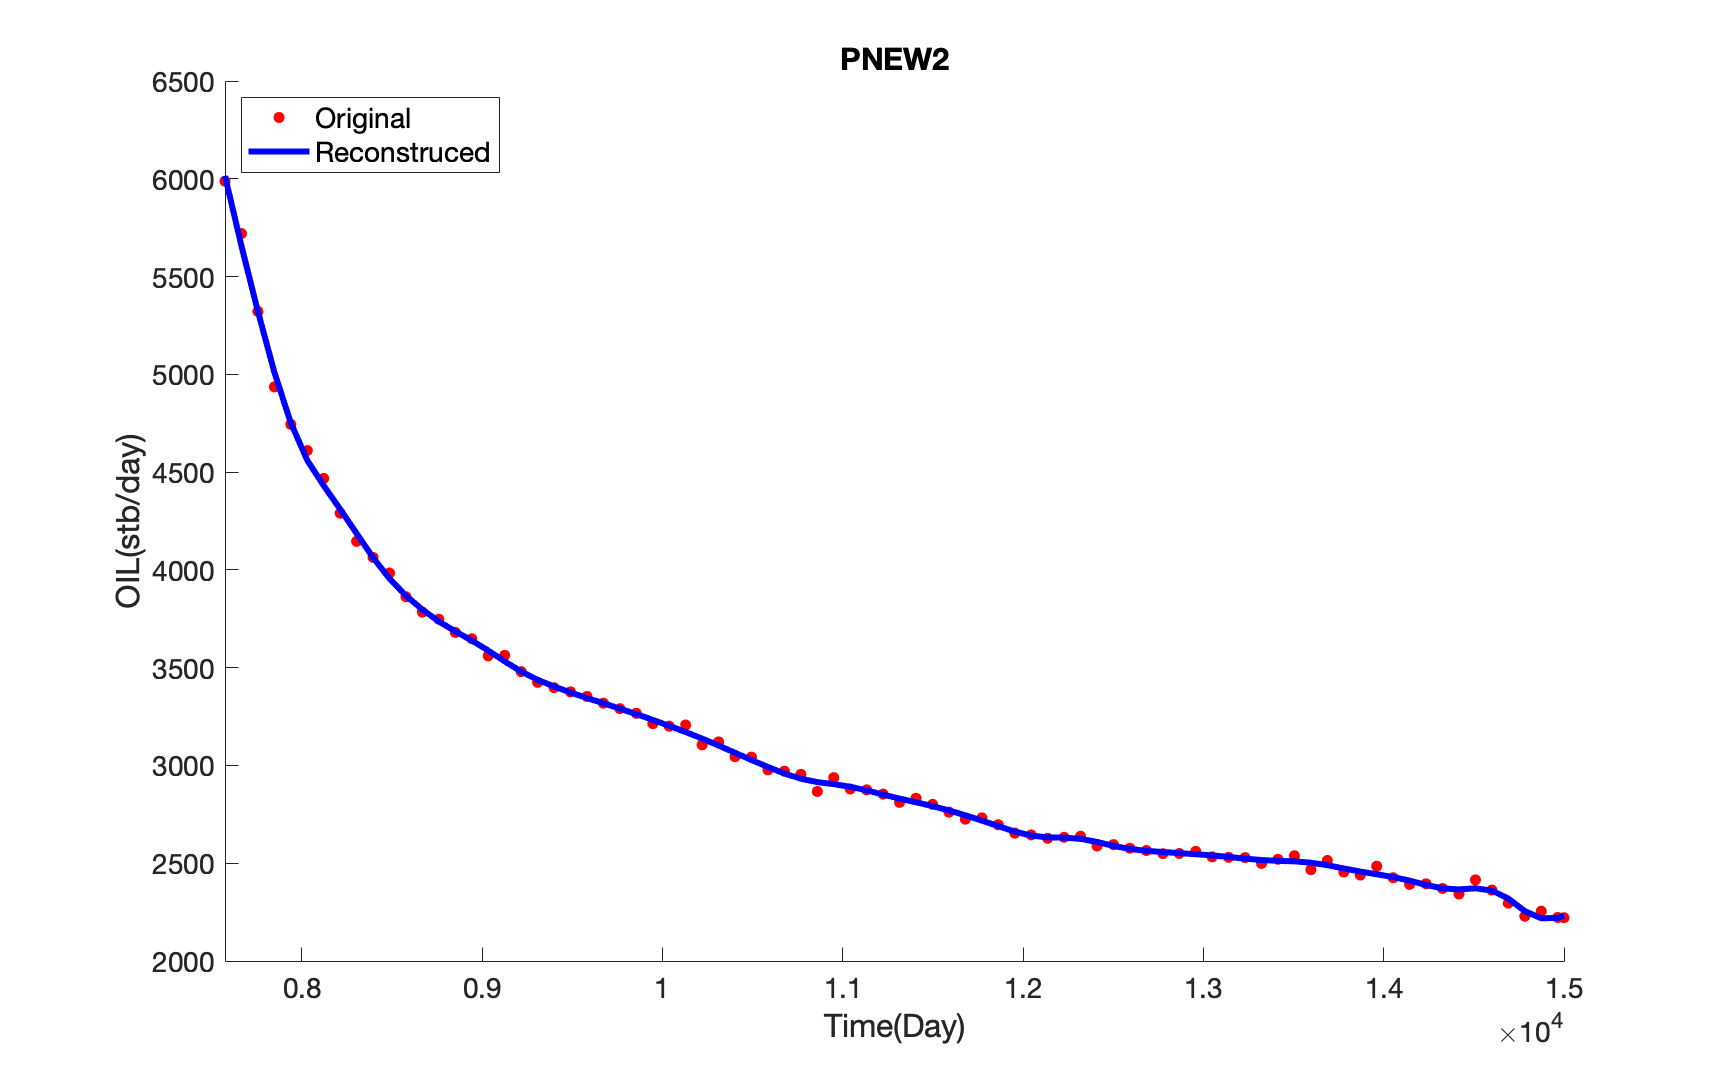

In [10]:
FDA_Parameters_data=struct('norder',3,'nknots',30,...
    'StartTime',0,'EndTime',7500,'Type','bspline','tgrid',Posterior4DataTimeStep); 

FDA_Parameters_data.nbasis=FDA_Parameters_data.nknots+FDA_Parameters_data.norder-2;

FPCA_Oilrate_data=PerformFDA_FPCA(FDA_Parameters_data,Posterior4DataTimeStep,Posterior4DataOilrate,[1],2,WellNamesData,true,'OIL(stb/day)');
FPCA_Watercut_data=PerformFDA_FPCA(FDA_Parameters_data,Posterior4DataTimeStep,Posterior4DataWatercut,[1],2,WellNamesData,true,'WATERCUT');

FDA_Parameters_prediction=struct('norder',3,'nknots',30,...
    'StartTime',ReferenceTimeStep.Prediction(1),'EndTime',ReferenceTimeStep.Prediction(end),'Type','bspline','tgrid',Posterior4PredictionTimeStep); 

FDA_Parameters_prediction.nbasis=FDA_Parameters_prediction.nknots+FDA_Parameters_prediction.norder-2;

FPCA_Oilrate_prediction=PerformFDA_FPCA(FDA_Parameters_prediction,Posterior4PredictionTimeStep,...
    Posterior4PredictionOilrate,[1],1,WellNamesPrediction,true,'OIL(stb/day)');

## Mixed PCA

In [11]:
[Posterior4.Data.Oilrate.Mixed,Posterior4.Data.Oilrate.ReconstructedCurvesFromMixed]...
    =PerformMixedPCA_fromFPCA(Posterior4DataTimeStep,FPCA_Oilrate_data,99.999,[]);%

[Posterior4.Data.Watercut.Mixed,Posterior4.Data.Watercut.ReconstructedCurvesFromMixed] ... 
    =PerformMixedPCA_fromFPCA(Posterior4DataTimeStep,FPCA_Watercut_data,99.999,[]);

[Posterior4.Prediction.Oilrate.Mixed,Posterior4.Prediction.Oilrate.ReconstructedCurvesFromMixed] ... 
    =PerformMixedPCA_fromFPCA(PriorPredictionTimeStep,FPCA_Oilrate_prediction,99.9999,[]);

In [12]:
%% For the data variables, additional PCA is applied.
rmpath('../packages/fda_matlab/')
Posterior4.Data.MixedAll = MixedPCA_phase([Posterior4.Data.Oilrate.Mixed,...
    Posterior4.Data.Watercut.Mixed],99.9999,[]);

# Compare distribution of model variables

## Global model variables

In [13]:
GlobalParameters_Prior = load('GlobalParameters_Prior.mat','GlobalTotal');
GlobalParameters_Prior = GlobalParameters_Prior.GlobalTotal;
GlobalParameters_Posterior4 = load('GlobalParameters_Iter4.mat','GlobalTotal');
GlobalParameters_Posterior4 = GlobalParameters_Posterior4.GlobalTotal;

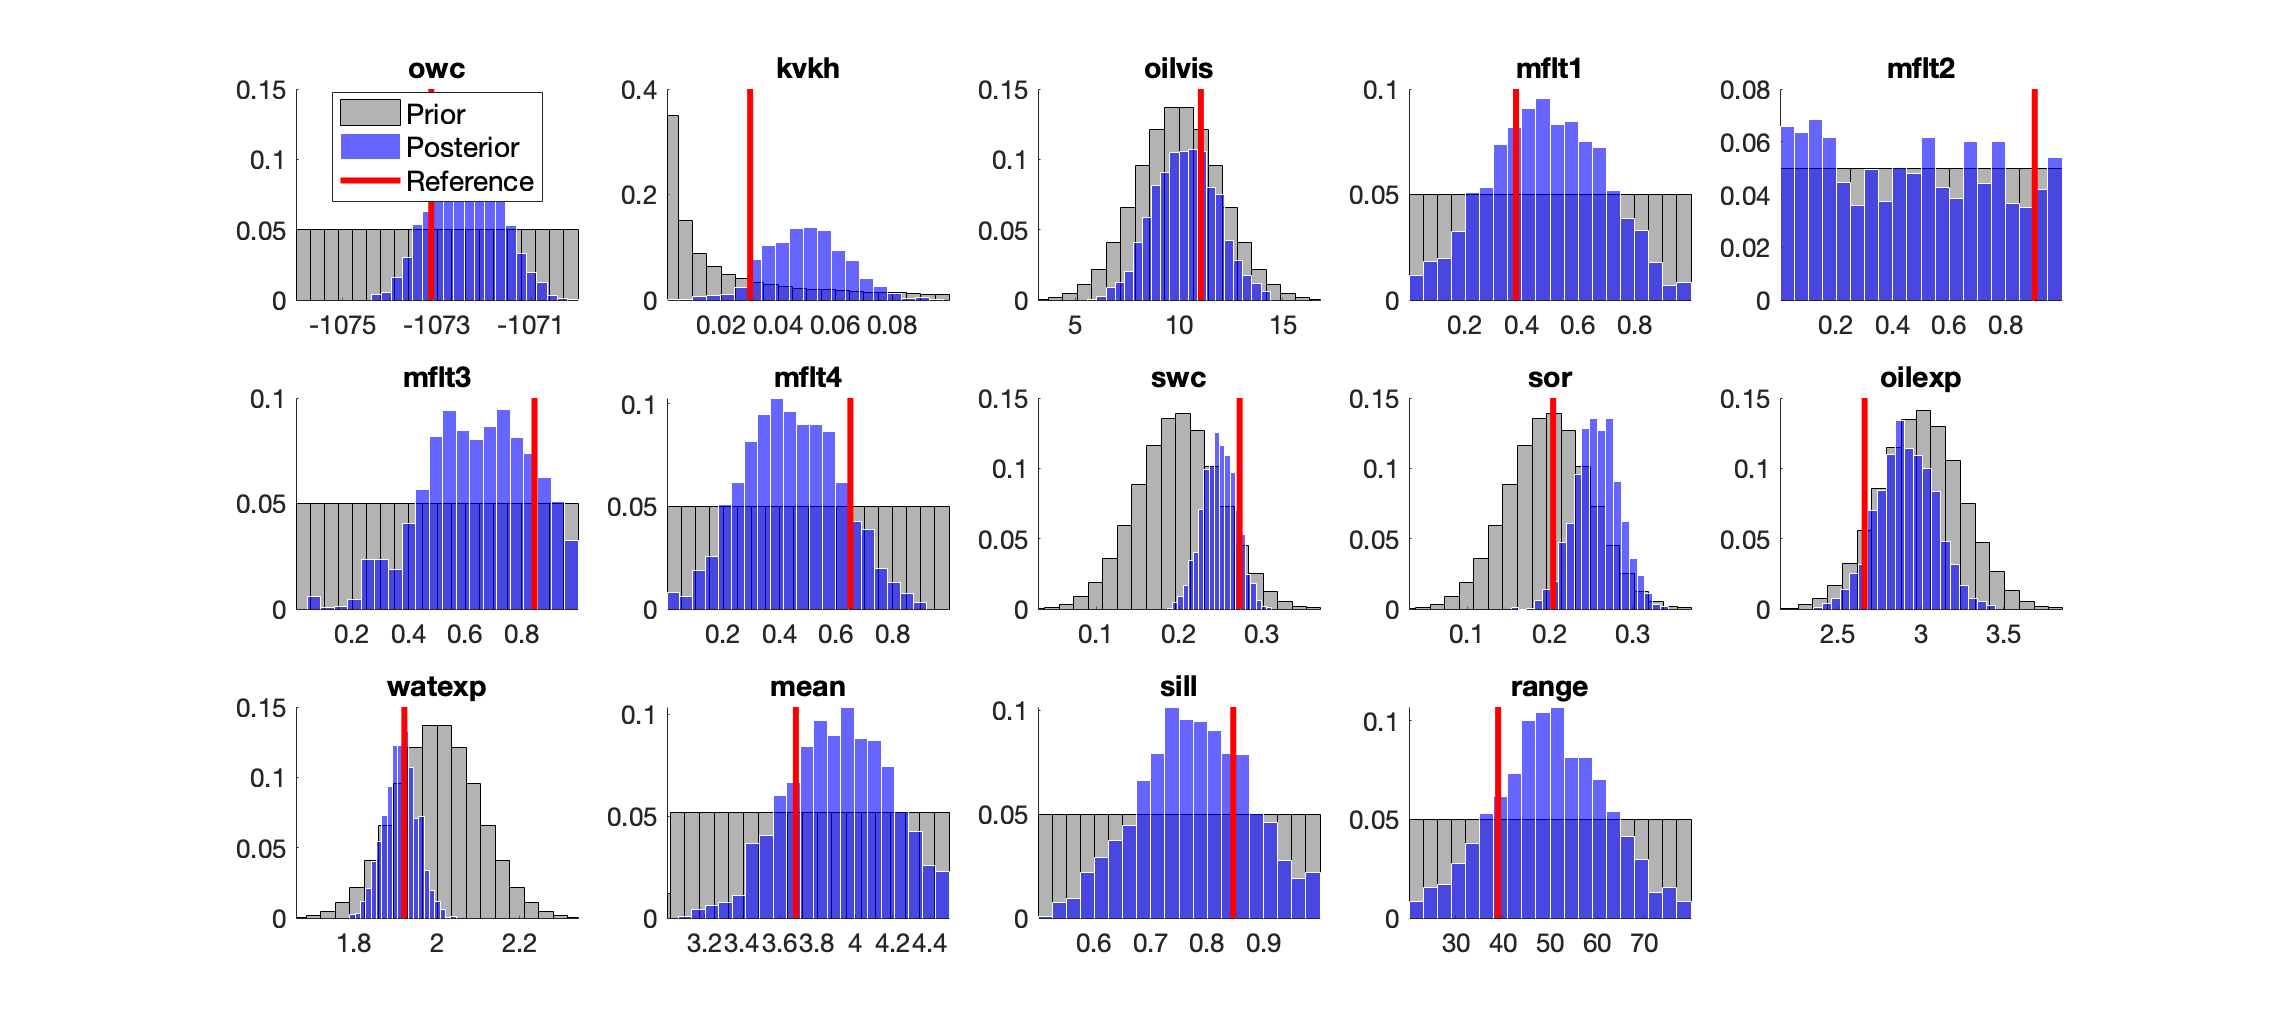

In [14]:
CompareDistributionHistograms_Two(GlobalParameters_Prior.ParameterValues,...
    GlobalParameters_Posterior4.ParameterValues,14,3,GlobalParameters_Prior.ParameterValues(ReferenceNumberPrior,:),...
    {'Prior','Posterior','Reference'},GlobalParameters_Prior.Names);
set(gcf,'Position',[397 462 1139 516]);

## Spatial model variables

Load spatial variables 

In [15]:
SpatialParameters_Posterior4 = load('SpatialParameters_Posterior4.mat');
SpatialParameters_Posterior4 = SpatialParameters_Posterior4.GS.Realz;

E-type and conditional variance

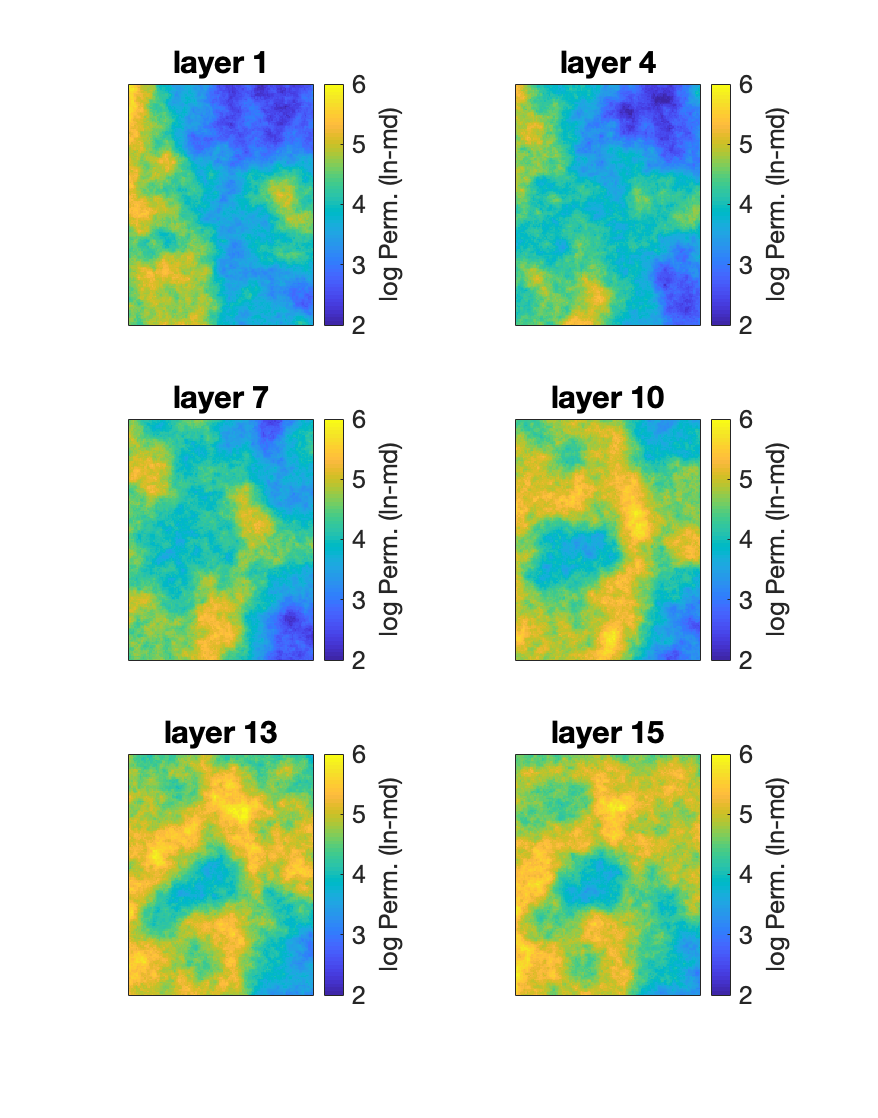

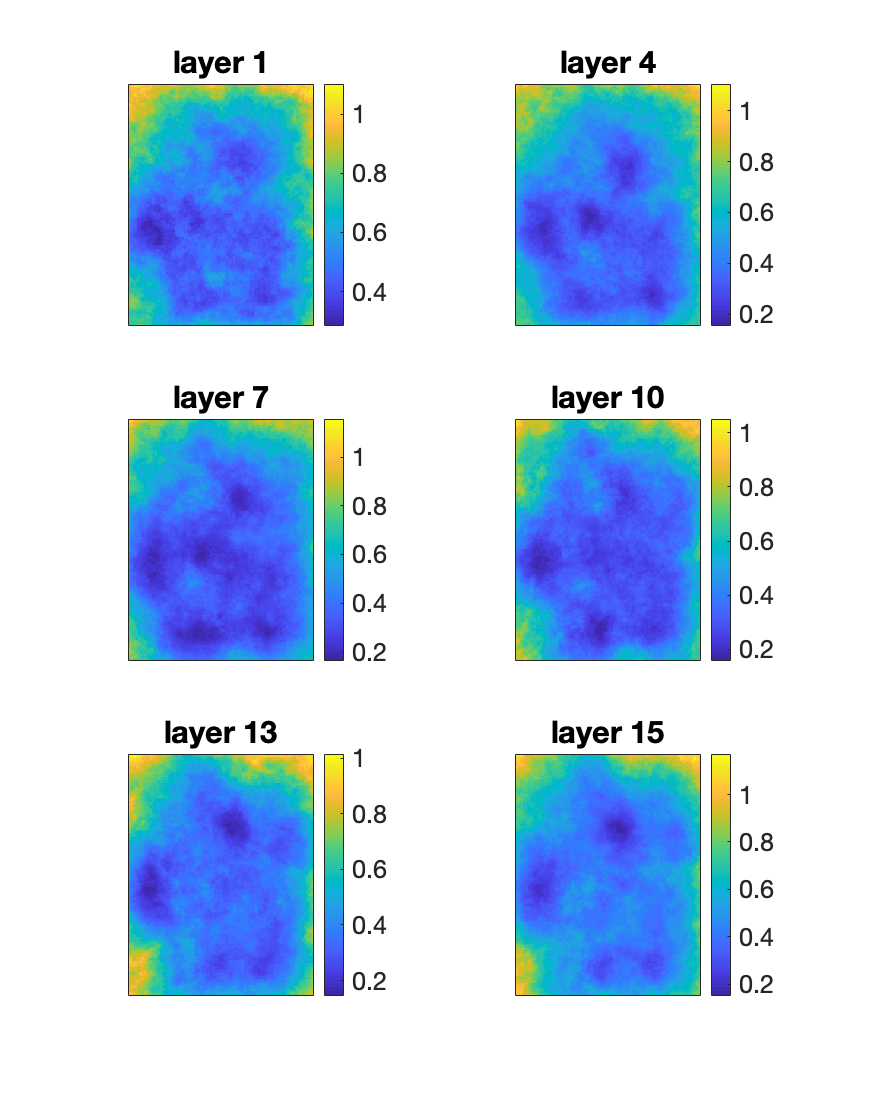

In [16]:
DisplayZSliceFrom3D(3,mean(SpatialParameters_Posterior4,1),1,127,165,15,[1,4,7,10,13,15],[2,6]); 
set(gcf,'Position',[642 403 439 559])
DisplayZSliceFrom3D(3,var(SpatialParameters_Posterior4,[],1),1,127,165,15,[1,4,7,10,13,15]); 
set(gcf,'Position',[642 403 439 559])

Visualize two samples

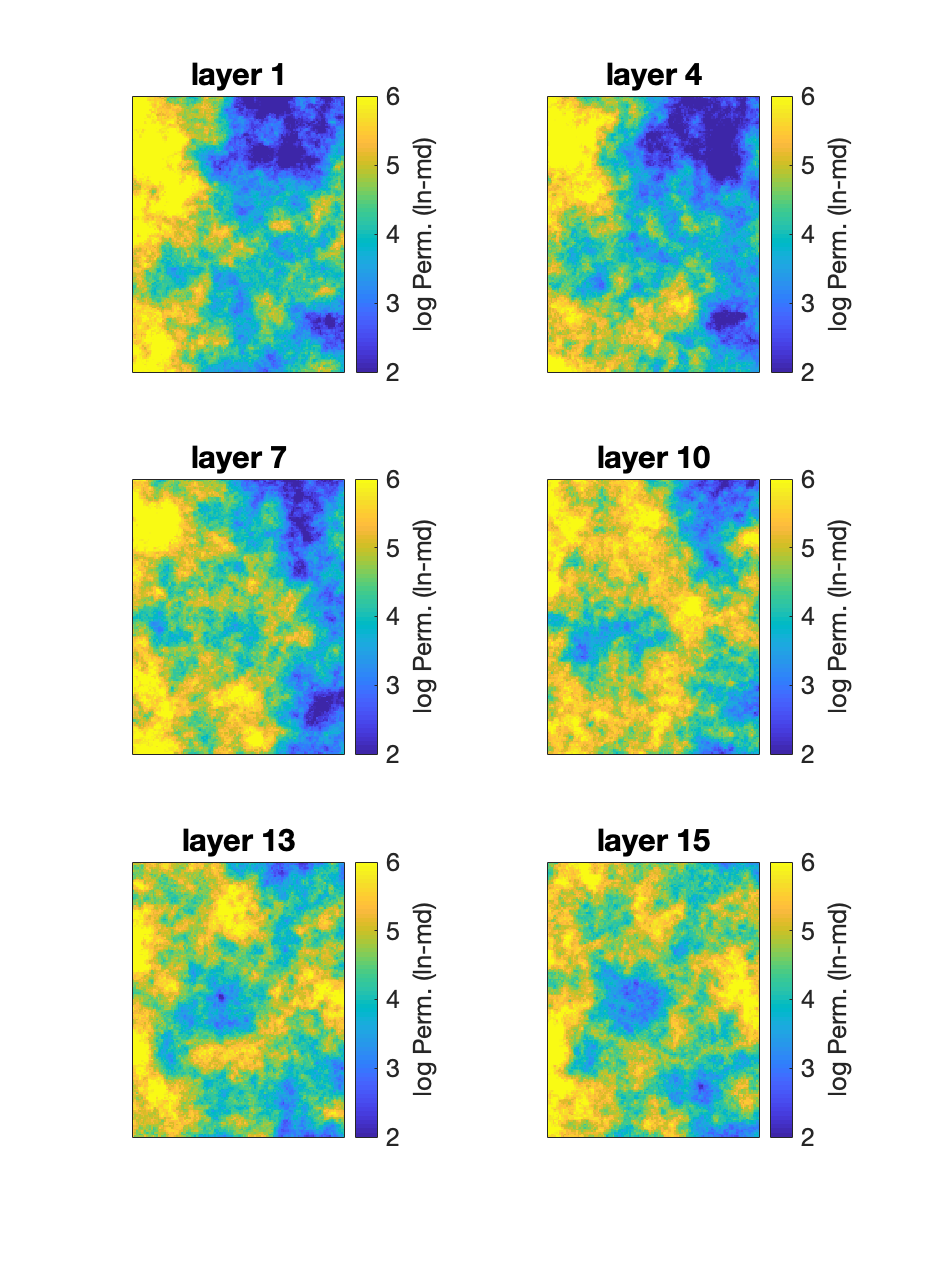

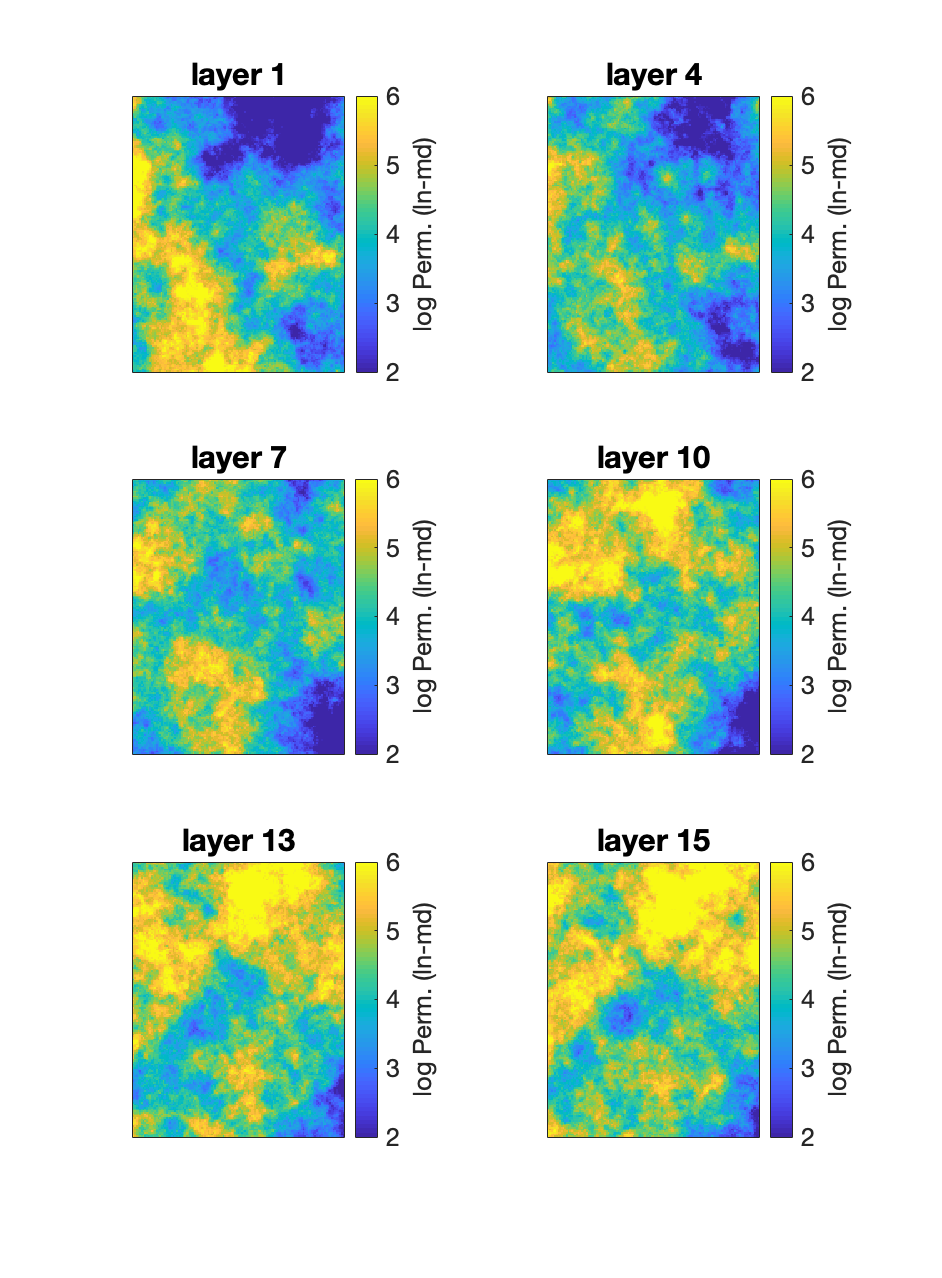

In [17]:
[~,idx_sorted]=sort(sum((Posterior4.Data.MixedAll.ReducedDataSet-Posterior4.Data.MixedAll.ReducedDataSet(ReferenceNumberPosterior4,:)).^2,2));
DisplayZSliceFrom3D(3,SpatialParameters_Posterior4(idx_sorted(2),:),1,127,165,15,[1,4,7,10,13,15],[2,6]); 
set(gcf,'Position',[680 339 471 639]);
DisplayZSliceFrom3D(3,SpatialParameters_Posterior4(idx_sorted(3),:),1,127,165,15,[1,4,7,10,13,15],[2,6]); 
set(gcf,'Position',[680 339 471 639]);

Comparision of spatial model variables by PCs is more complicated than global variables because PCA should be applied to both prior and posterior samples. Due to large requirement of memory, this job was done with HPC enviroment and results are saved (`PCA_Info_Field_all_OS_iter0` and `PCA_Info_Field_all_OS_iter4`). In this notebook, the final results will be loaded. 

First, compare prior and posterior (1st iteration)

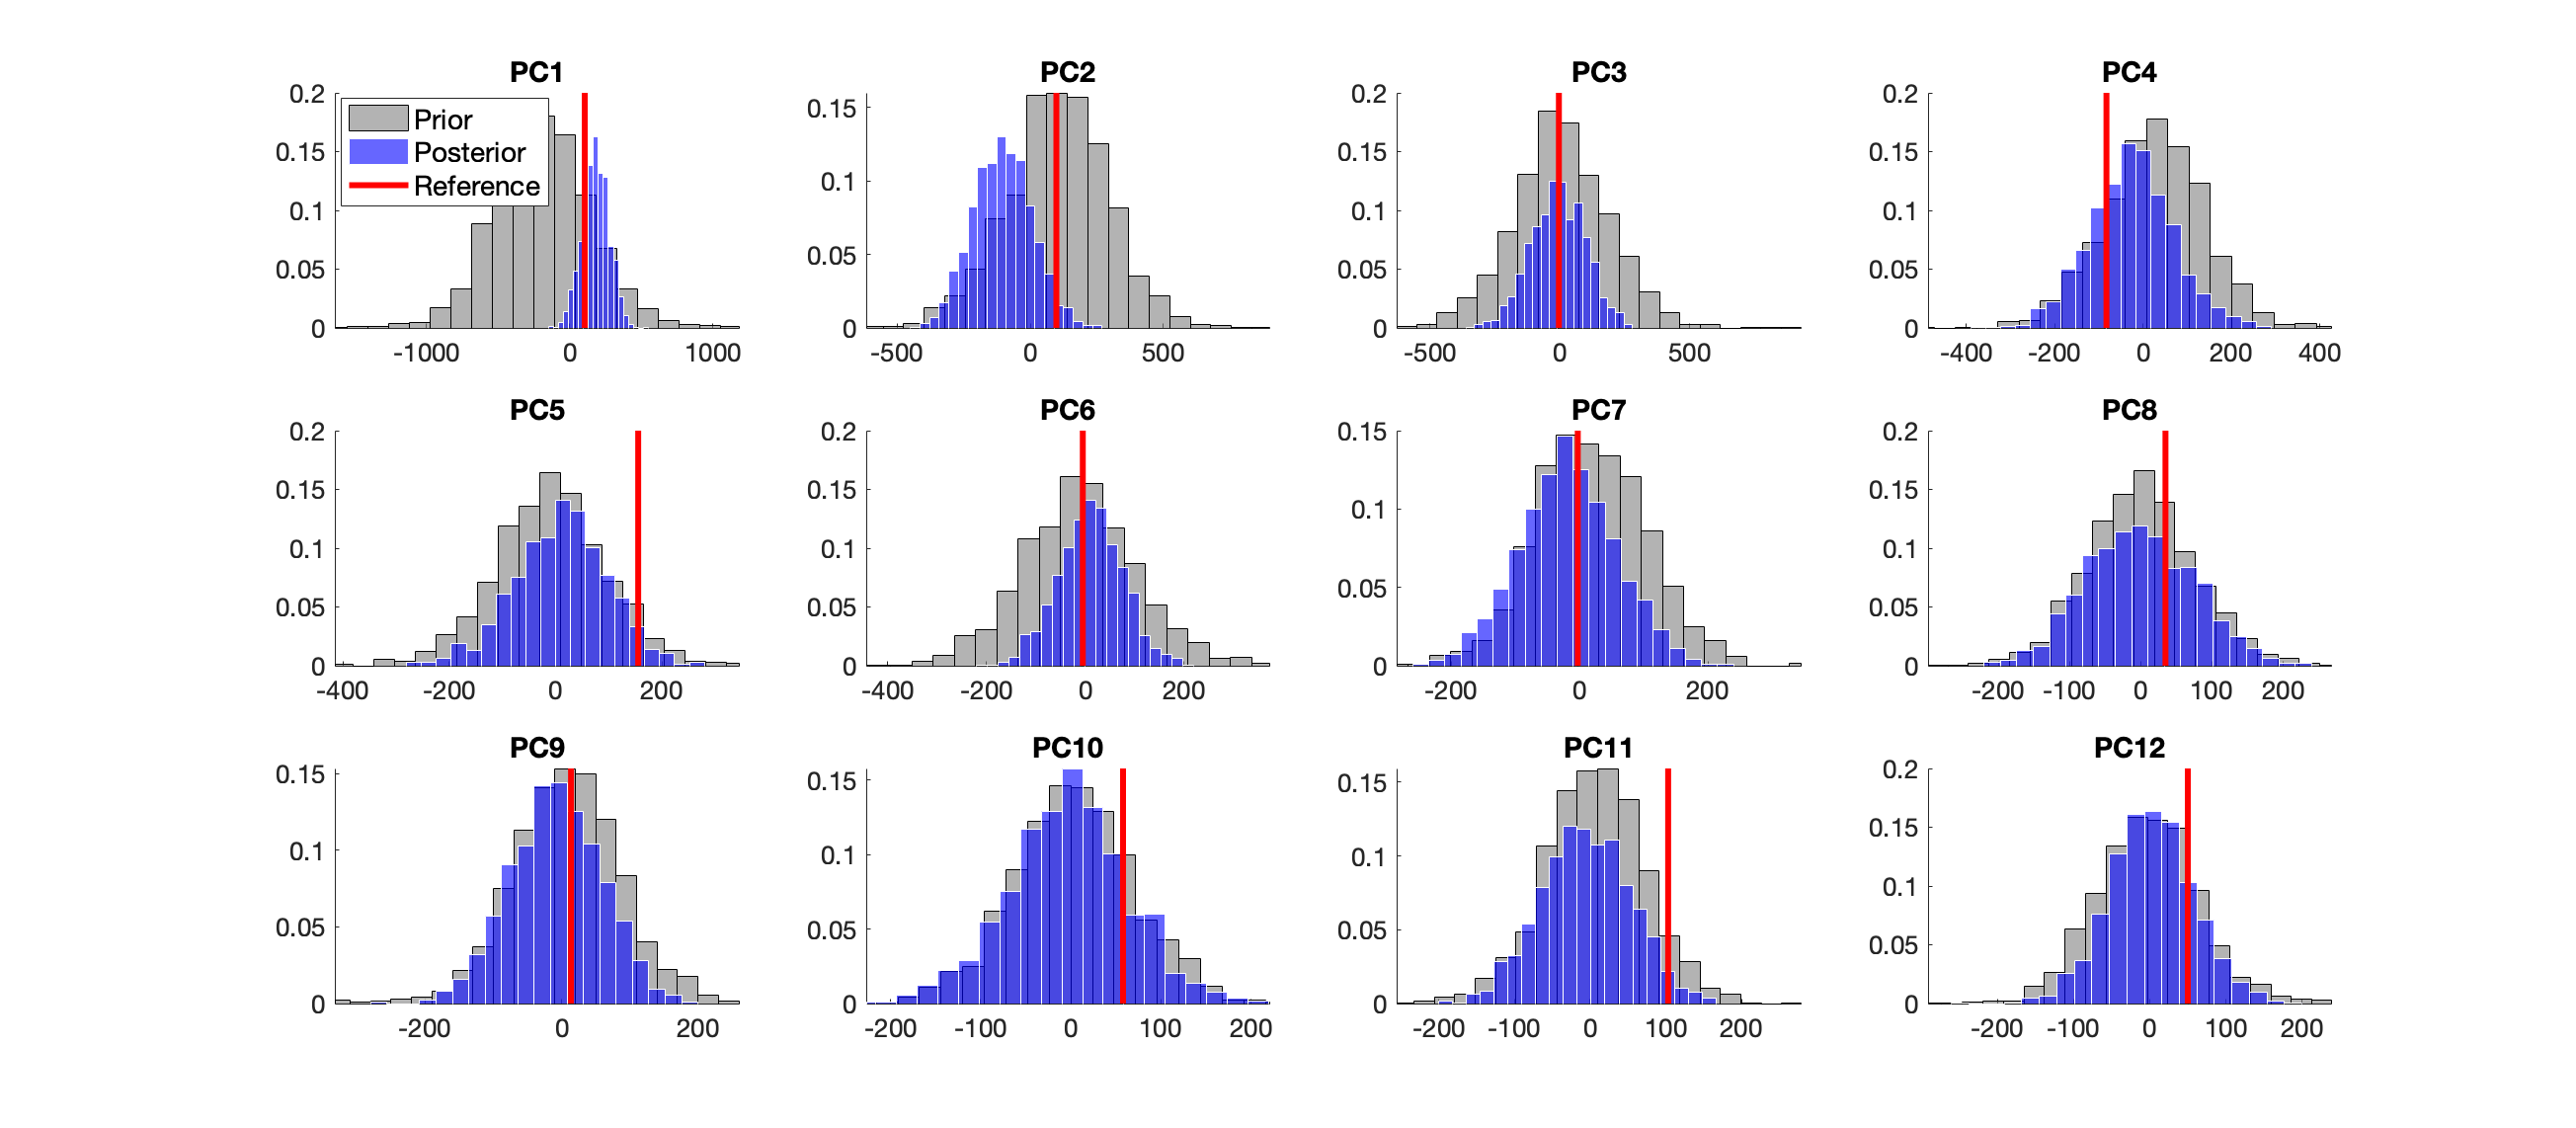

In [18]:
load('PCA_Info_Field_all_OS_iter0.mat');
CompareDistributionHistograms_Two(PCAInfo_Field_Alltogether.Chosen.score(1:NPrior,:),PCAInfo_Field_Alltogether.Chosen.score(NPrior+1:end,:),...
    12,3,PCAInfo_Field_Alltogether.Chosen.score(ReferenceNumberPrior,:),{'Prior','Posterior','Reference'});
set(gcf,'Position',[291 407 1304 571]);

Second, compare prior and posterior from last iterations (4th iteration)

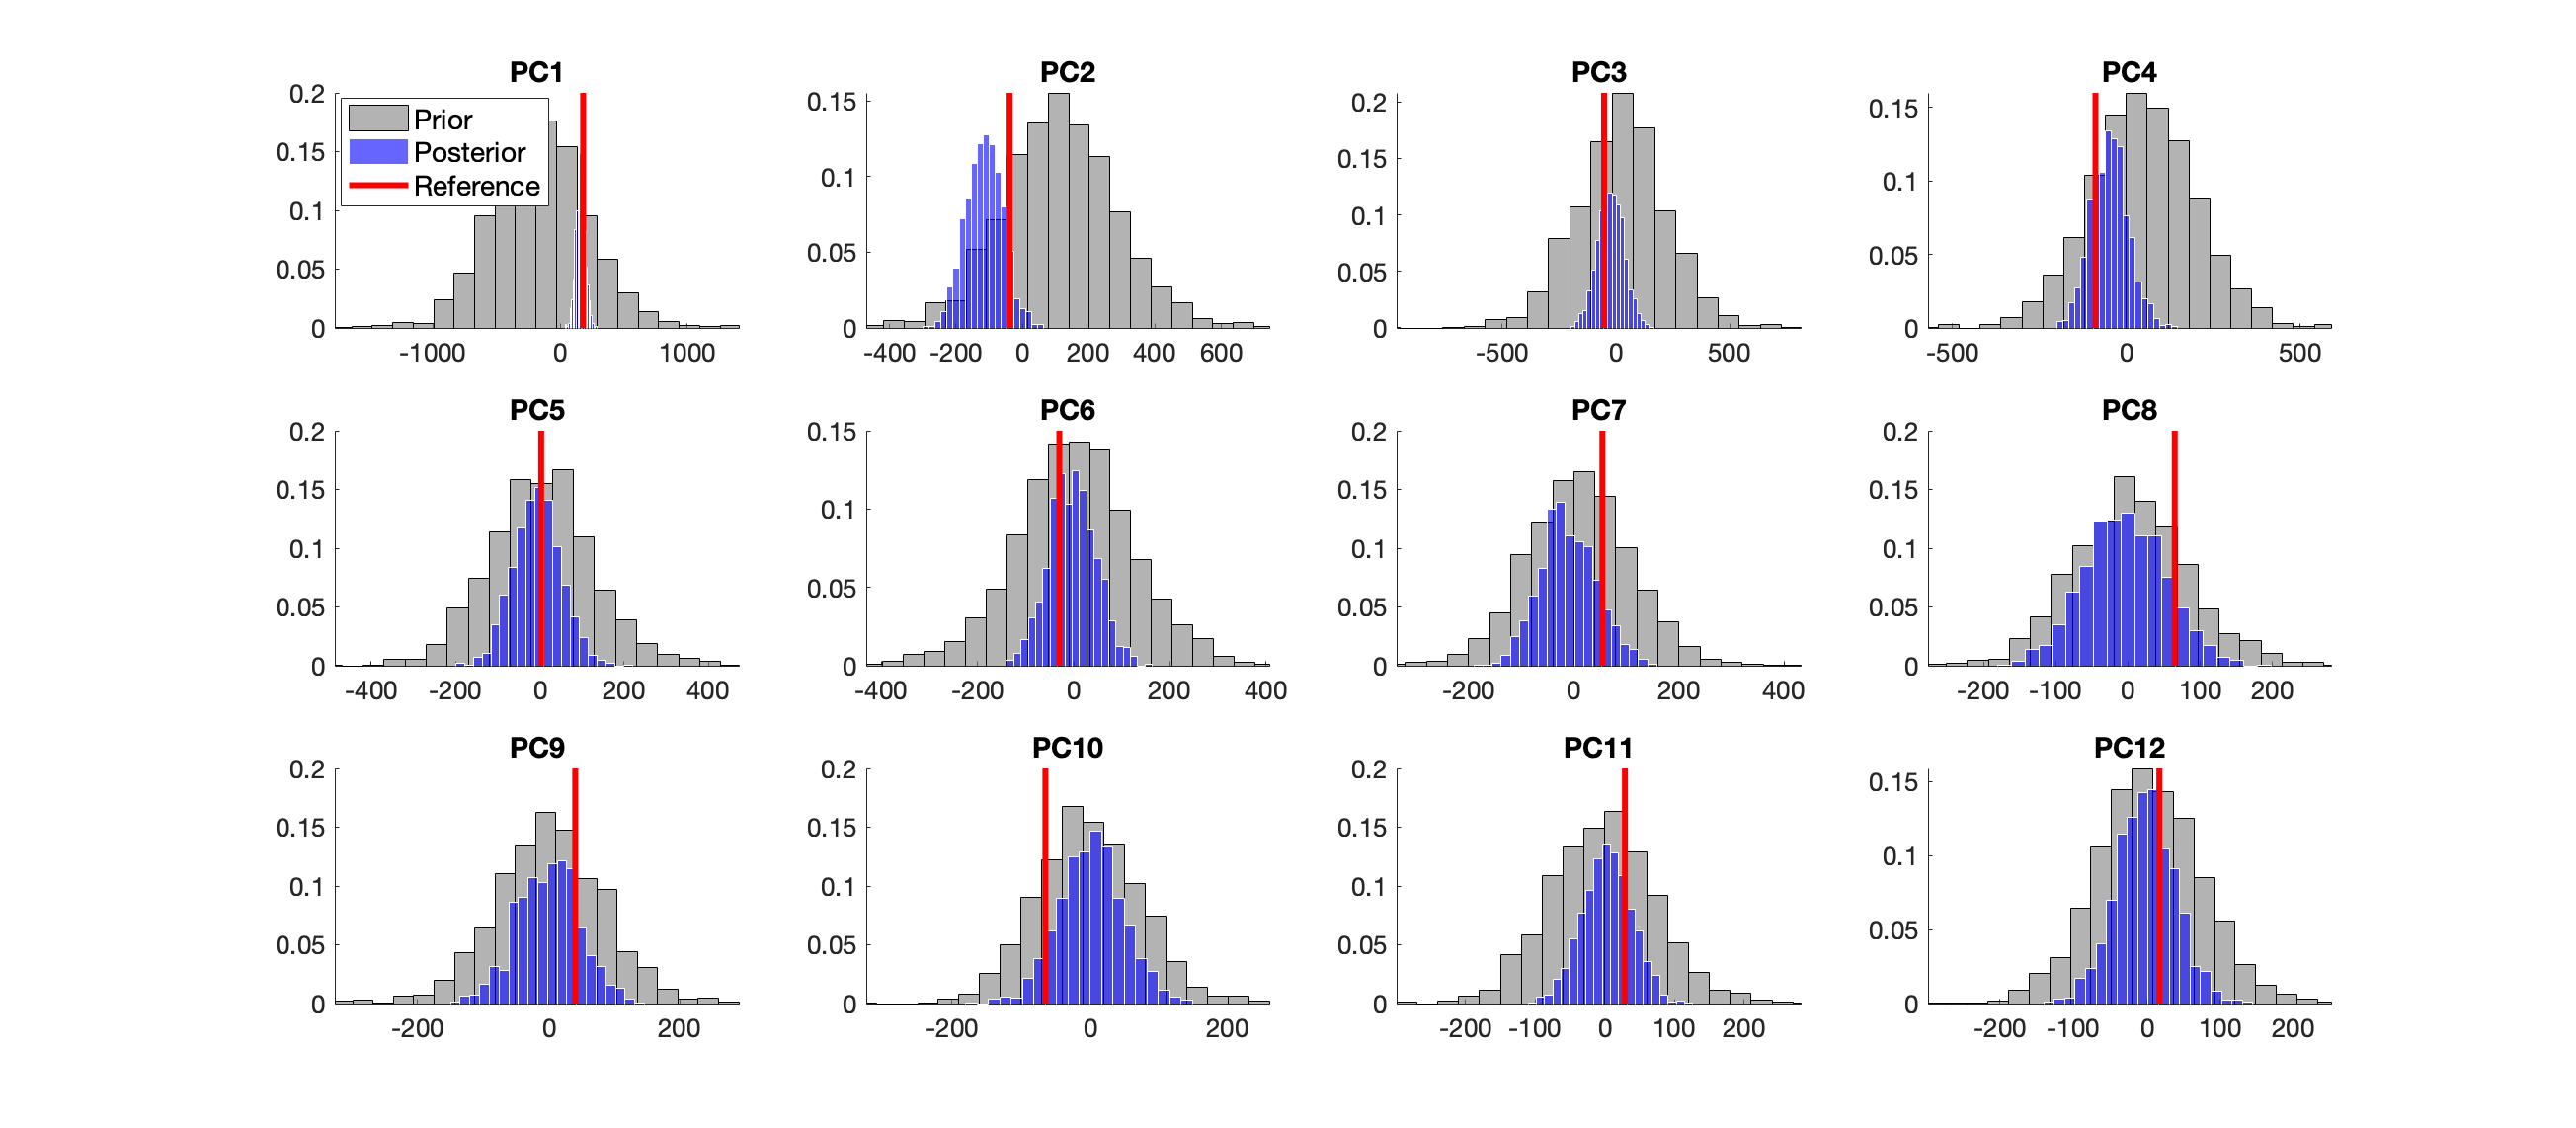

In [19]:
load('PCA_Info_Field_all_OS_iter4.mat');
CompareDistributionHistograms_Two(PCAInfo_Field_Alltogether.Chosen.score(1:NPrior,:),PCAInfo_Field_Alltogether.Chosen.score(NPrior+1:end,:),...
    12,3,PCAInfo_Field_Alltogether.Chosen.score(ReferenceNumberPrior,:),{'Prior','Posterior','Reference'});
set(gcf,'Position',[291 407 1304 571]);

# Compare results by iterations

The code block below displays how the end value of well P3 evolve over iterations.

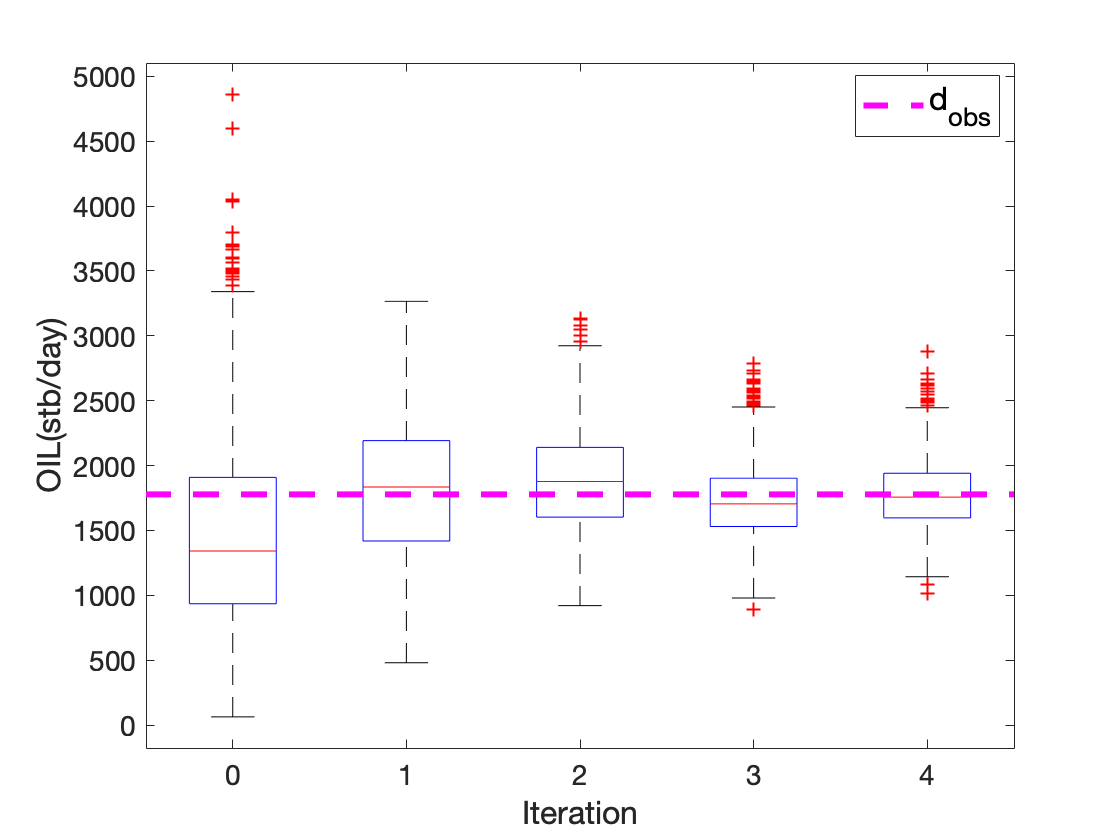

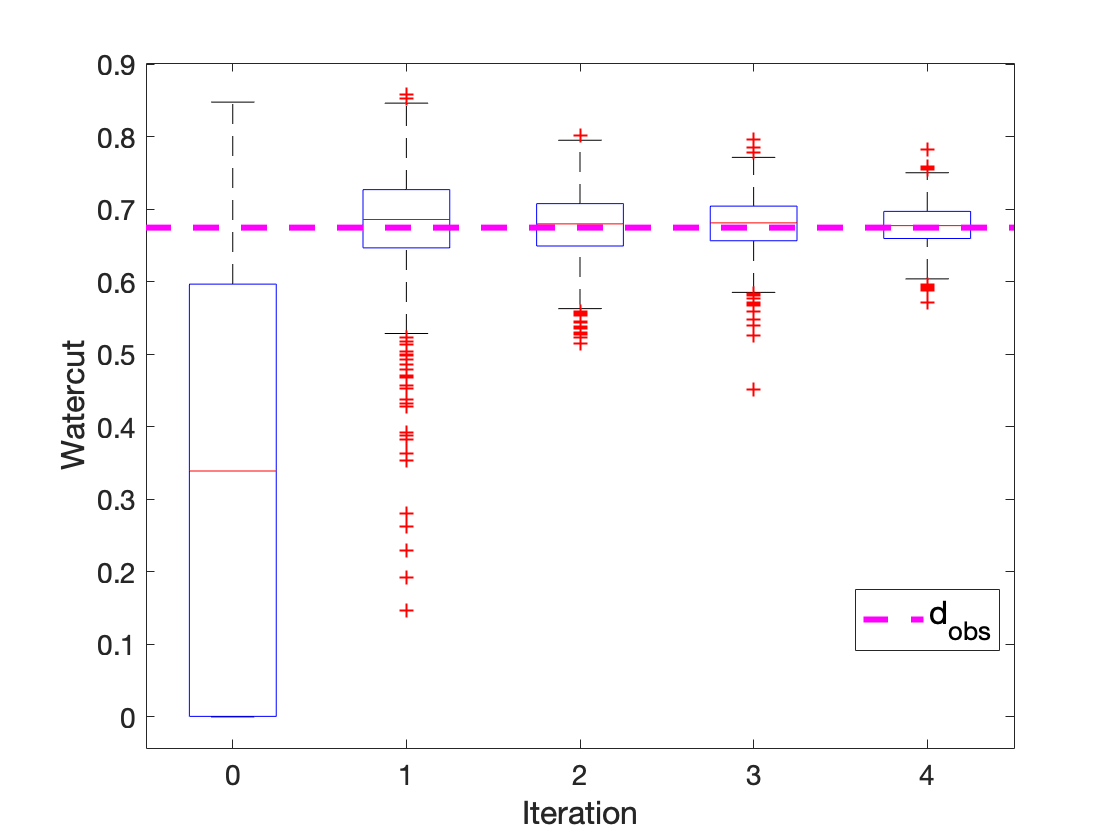

In [41]:
filelist_response = dir("../datafiles/Responses/");
filelist_response = {filelist_response.name};
filelist_response(1:2) = [];

Well2Display = 'P3';
CompareIterations(filelist_response,ReferenceNumberPrior,Well2Display)